## <Section 1 - Data Exploration and Pre-processing>

In [1]:
#importing nesscary libraries for data handling, visualisation, and computational tasks
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Load the dataset
df = pd.read_csv('Sleep_health_and_lifestyle_dataset.csv', keep_default_na=False)

In [2]:
#Drop duplicate rows to avoid biased model training
df = df.drop_duplicates()

Removing the duplicated rows ensures that no data points are repeated, that of which can unfairly influence the training outcomes or inflate performance metrics

In [3]:
# Display the first few rows of the dataframe
df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


Helps to visualise, by giving an overview of the data types, and the non-null counts for each column. Essential to spot potential issues with null values or incorrect type.

---

In [4]:
#basic info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           374 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


This gives an overview of data types and non-null counts for each column. Which is essential to spot potential issues with null values or incorrect type.

---

In [5]:
#check for null values
df.isnull().sum()

Person ID                  0
Gender                     0
Age                        0
Occupation                 0
Sleep Duration             0
Quality of Sleep           0
Physical Activity Level    0
Stress Level               0
BMI Category               0
Blood Pressure             0
Heart Rate                 0
Daily Steps                0
Sleep Disorder             0
dtype: int64

Identifying null values early, allows us to decide between imputation, or row removal methods or strategies.

---

In [6]:
#check for class distribution
df['Sleep Disorder'].value_counts()

Sleep Disorder
None           219
Sleep Apnea     78
Insomnia        77
Name: count, dtype: int64

The class distribution is important, as it determines whether the classification task is balanced or imbalanced. Affecting model performance and evaluation choices. 

---

In [7]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           374 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,187.500000,42.184492,7.132086,7.312834,59.171123,5.385027,70.165775,6816.844920
std,108.108742,8.673133,0.795657,1.196956,20.830804,1.774526,4.135676,1617.915679
min,1.000000,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000
25%,94.250000,35.250000,6.400000,6.000000,45.000000,4.000000,68.000000,5600.000000
50%,187.500000,43.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000
75%,280.750000,50.000000,7.800000,8.000000,75.000000,7.000000,72.000000,8000.000000
max,374.000000,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000


Here i am rechecking the structure, and getting statistical summaries after the cleaning process, giving insights into the datas spread and to check for any further anomalies.

---

In [8]:
#Split and assign using vectorized operations
bp_split = df['Blood Pressure'].str.split('/', expand=True)
df["High_BP"] = pd.to_numeric(bp_split[0], errors='coerce')
df["Low_BP"] = pd.to_numeric(bp_split[1], errors='coerce')

#Drop the original Blood Pressure column
df.drop(columns=['Blood Pressure', "Person ID"], inplace=True)

The reason for this was, "Blood Pressure" as a (string) isnt helpful for modeling. Hence splitting it into numeric, makes it more analyzable. While "Person ID" was dropped due to its irrelevancy to predicitions.

---

## Visual Exploratory Data Analysis (EDA)

## Overview of Numerical Variables

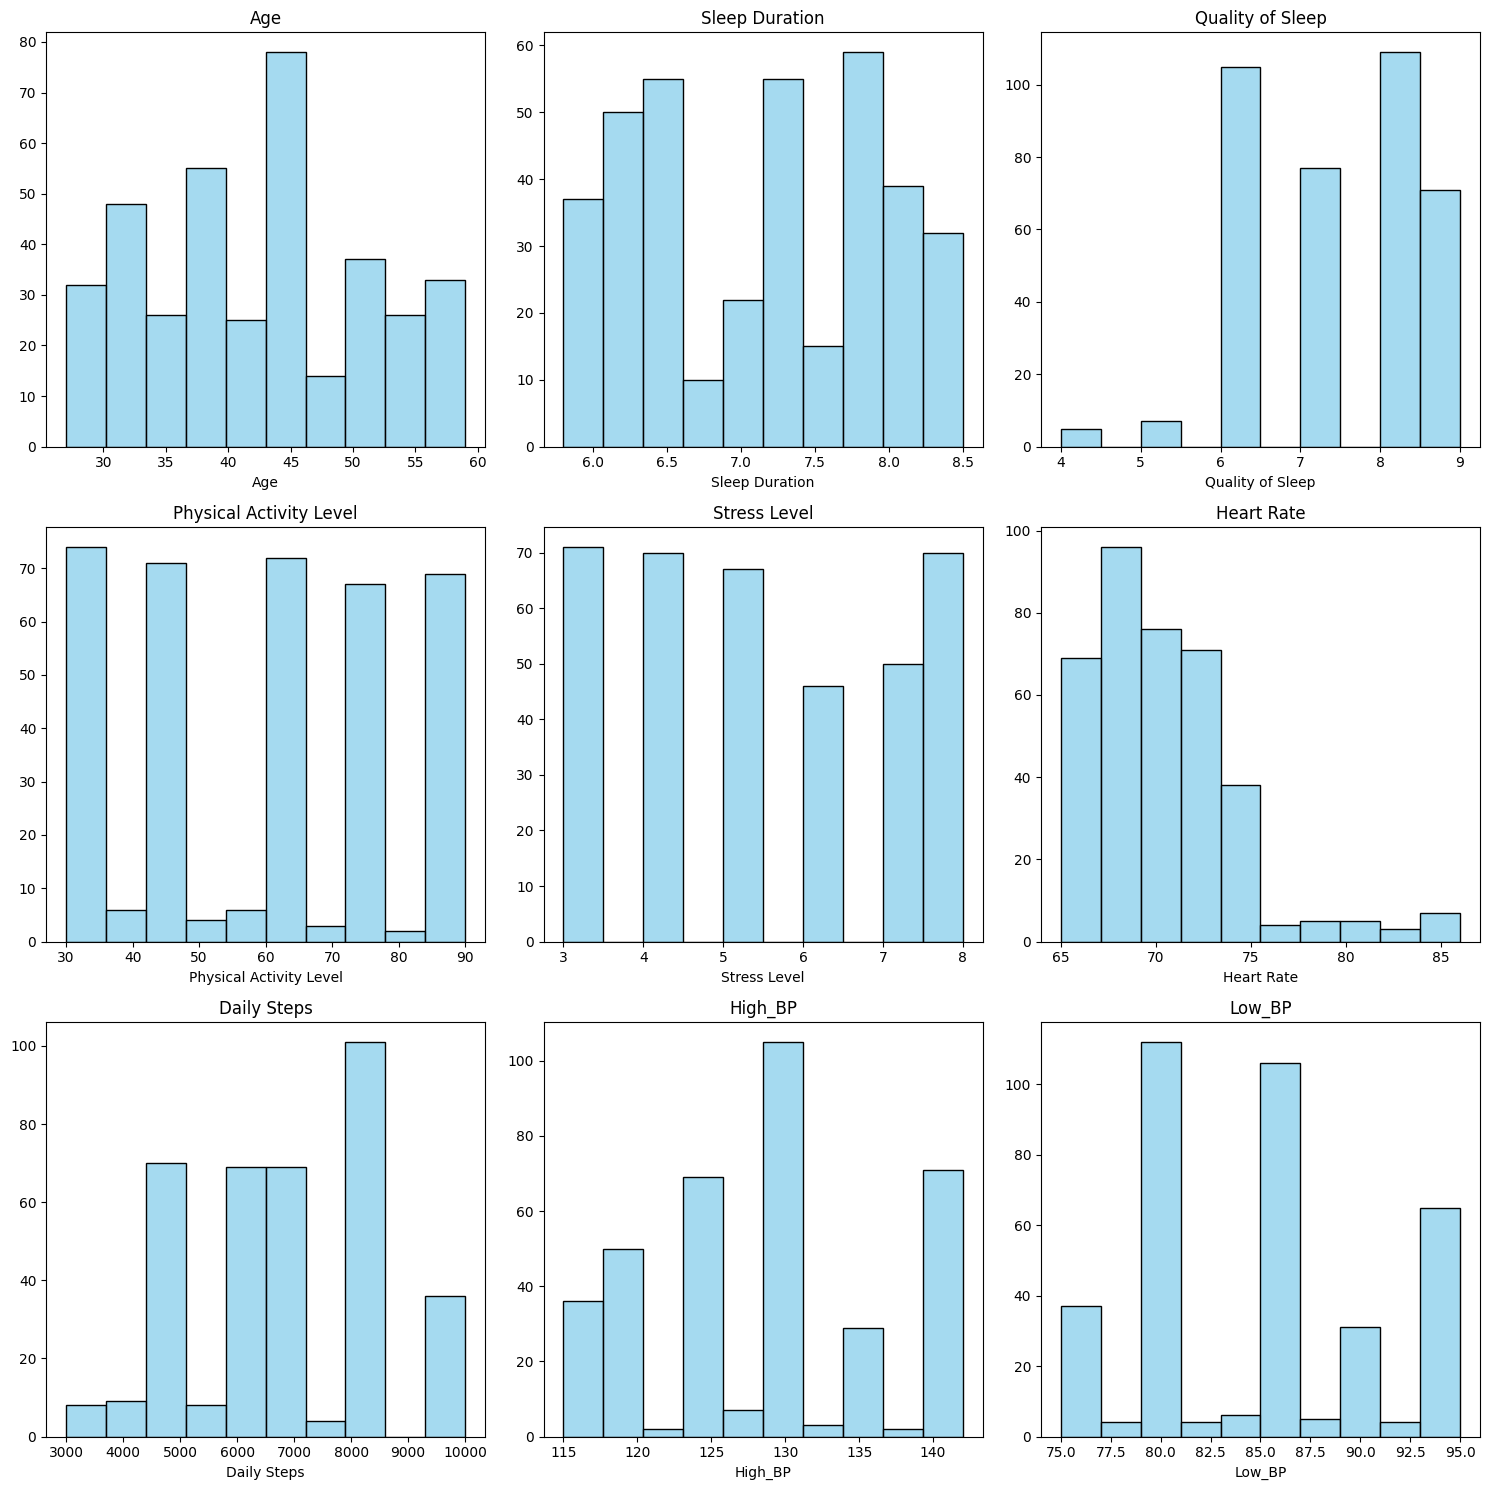

In [9]:
#List of numerical columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

#Creating a suboutine to plot histograms for numerical columns
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(15, 15))
plt.subplots_adjust(hspace=0.5, wspace=0.3)

#for easier indexing
axs = axs.flatten()

for ax, col in zip(axs, numerical_cols):
    sns.histplot(data=df, x=col, bins=10, ax=ax, color='skyblue')
    ax.set_title(col)
    ax.set_ylabel('')
    
plt.tight_layout()
plt.show()

#### Age: 
Its distribution is irregular with mulitple peaks (multimodel), especially around 45. While it has no extreme outliers, it does have low counts at both ends, it is also slightly right-skewed (fewer older participants). With a strong clustering around the mid-40s, actually suggest a middle-aged dominant sample.

#### Sleep Duration: 
Its distribution is fairly uniform, mild peaks at 6.5, 7.5, and 8.0. It can be seen that there are very few short (<6) or very long sleepers (>8.5). It is slightly left-skewed, suggesting that there are more longer sleepers than short. It can also be seen that a slight dip around the 7 hour mark, the common average, which is quite interesting, as it might reflect a data quirk, or lifestyle shift among the participants.

#### Quality of Sleep: 
With strong peaks, at 6, 7, and 8, it can be seen to almost form a trimondal distribution, displaying a mild left-skewness, which indicates that more people experience good sleep quality. However, there are a few very low quality scores (4, 5), and despite moderate sleep durations, many report high-quality sleep, which might be worth comparing with stress levels.

#### Physical Activity Level: 
Its distribution is highly irregular, clearly grouped values like 30, 40, 60, 70, 80 and 90. Due to the discrete clustering, there doesnt seem to be a natural skew, as well as no apparent outliers. Sharp drops between bins can be seen.

#### Stress Level: 
Its distribution is fairly uniform, mild peaks at 3, 4, 5, and 8. It is slightly right-skewed, implying more people reporting higher stress. It is well distributed from 3-8, and doesnt seem to have a true outlier. Doesn't seem to have perticipants, who reported very low (1-2), or high (9-10) stress values. 

#### Heart Rate: 
Has a strong central peak between 68-72 bpm, but appears to be exponentially distributed, and skewed towards lower heart rates. Appears to be a fairly healthy sample group, seeing the normal range dominant.

#### Daily Steps: 
Distributed normally, from 3,000 to 10,000, with a sharp peak near 8,000. It is right-skewed, implying that more people walk more, while fewer walk very little. 8,000 being the highest, and 9,000 being the lowest which is a bit perculiar. But the dominant ranging from 6,000 to 9,000 can suggest influenced by fitness goals or lesser intake from (office job) workers, indicating a bias.

#### High Blood Pressure (Systolic): 
While somehwat normaly distributed, it peaks at 130, with steep drops at both ends. Slightly right-skewed, with higher systolic readings (>140). Anything above 140 is borderline hypertensive (aka not good - risk heart, kidney, brain damage). The peaks suggest most hover around the prehypertension range (high but not as bad ass hypertensive, risky).

#### Low Blood Pressure (Diastolic): 
It also appears to be somewhat normally distributed, peaking at 80, and 85. It is right-skewed, with a long tail abive 90.

#### Overall Analysis:
There are some noticeable distribution patterns and pecularities, across several variables. Features like Physical Activity Level, Stress Level, and Quality of Sleep, shows clear spacing, or banded groupings, might be due to the way responses were recorded, or the format of the survey questions. 

This same pattern can be observed in Blood Pressure (Both systolic, and diastolic) and Daily Steps, which could indicate rounding, predefined categories, making it hard to confirm true statistical distribution. Heart Rate, and Age appear more naturally distributed, with Heart Rate showing a near-normal shape, and Age being slightly skewed towards younger participants. 

While no extreme outliers were visually evident, the irregular bin clustering in some variables may have obsucred their presence. In Summary, the dataset appears to be relatively clean, intuitive relationships between the variables, particularly towards their potential influence on Sleep Quality. 

At this stage, no variable, can be confidently discarded, requiring a deeper statistical analysis, such as correlation, or feature importance testing later on, is warranted to evaluate their predictive relevance.

---

## Categorical Variables Overview

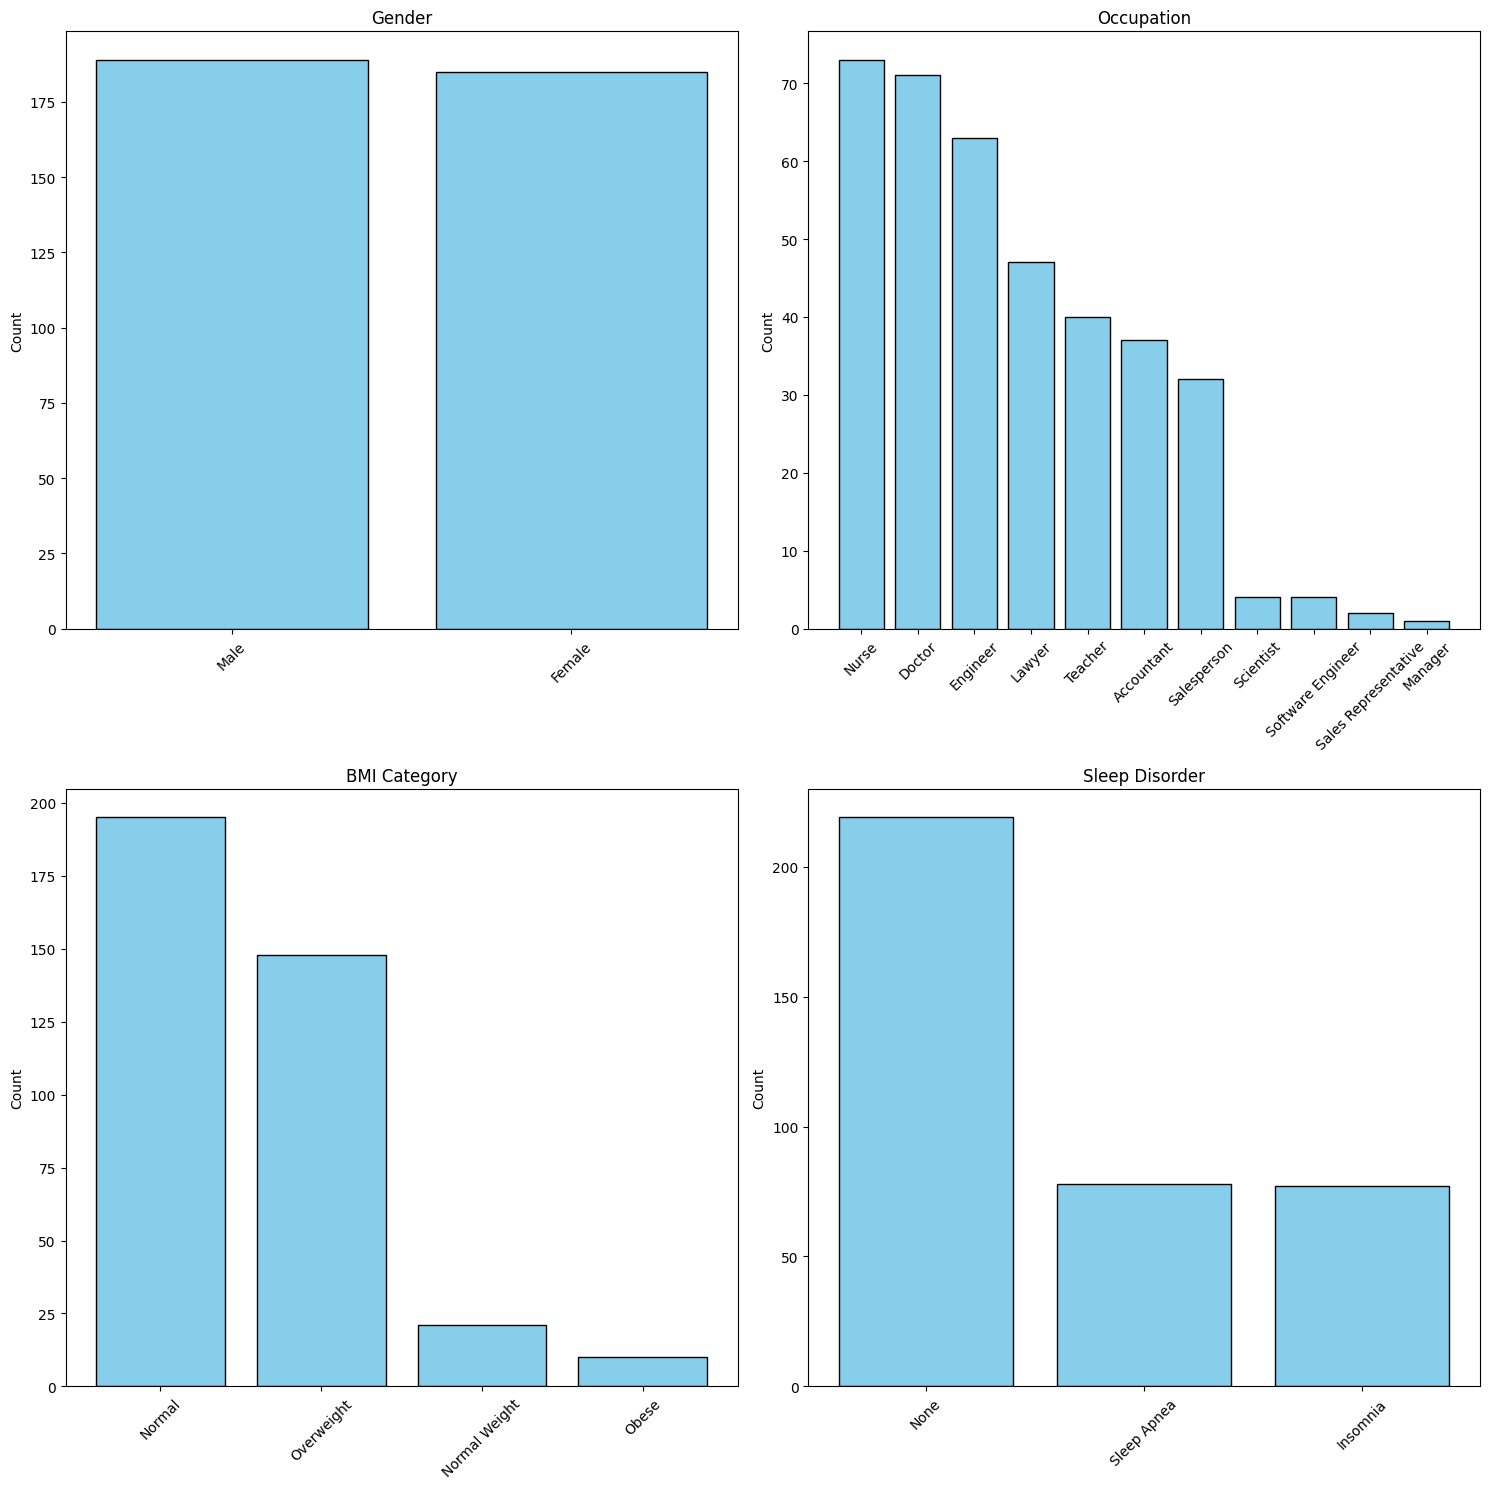

In [10]:
categorical_cols = ['Gender', 'Occupation', 'BMI Category', 'Sleep Disorder']

fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(15, 15))
plt.subplots_adjust(hspace=0.5, wspace=0.3)

axs = axs.flatten()

for ax, col in zip(axs, categorical_cols):
    value_counts = df[col].value_counts()
    ax.bar(value_counts.index, value_counts.values, color='skyblue', edgecolor='black')
    ax.set_title(col)
    ax.set_ylabel('Count')
    ax.tick_params(axis='x', rotation=45)
plt.tight_layout()
plt.show()

## Observations

#### Gender (Binary Class):
Distribution is near-perfect between male and female participants, male being slightly higher. Does not have a skewness, due to it being symmetric. 

#### Occupation: 
Highly right-skewed, most participants being concentrated in a few professions. It has a strong positive skew, dominated by Nurses, Doctors, and Engineers. It is noted that the roles like Manager, Sales Rep, and Software Engineer have extremely low representation, and can be treated as long-tail categorical outliers. 

The sharp drop in the frequency beyond the top 5 jobs, actually suggest occcupation grouping (merging the "rarer" jobs into "Others"), might be better and necessary to avoid bias, or overfitting in the model.

#### BMI Category: 
It is clearly, right-skewed, with Normal and Overweight making up of the majority, having a strong positive skew, very few participants are in the obese group. The presence of both "Normal" and "Normal Weight" as seperate categories is unusual and might be a "Typo", which i will be reclassifying as "Normal". 

The labeling inconsistency suggest the need for data cleaning, and or reclassification, in addition, the class imbalance may bias models that try to predict or analyze BMI-related outcomes, hence "Obese" will be added into "Overweight" category due to the lack of sample size.

#### Sleep Disorder: 
The distribution is highly imbalanced, with most individuals having no sleep disorders, resulting in a strong positive skew towards the "None" category. But its also important to note, if both disorders were added up, it is quite evenly split (with and without disorders)

#### Changes to be made: 
As mentioned earlier, BMI will be simplified, combining "Normal Weight" into "Normal" and "Obese" into "Overweight" category. This is to prevent overfitting, and can be done so as it is closely related. 

In addition, i will be taking the top 7 occupations in the dataset, and will be merging the rest into "Other" a new class, to reduce the number of unique categories, helping with model performance, and to avoid bias from the underrepresented classes.

---

## Making changes to BMI Category

In [11]:
df["BMI Category"] = df["BMI Category"].replace({
    "Normal Weight" : "Normal",
    "Obese" : "Overweight"
})

In [12]:
# Check the unique values in BMI Category after the change
print("Unique BMI Categories after replacement:")
print(df['BMI Category'].unique())

Unique BMI Categories after replacement:
['Overweight' 'Normal']


---

## Merging underrepresented classes

In [13]:
#Group rare occupations into 'Other'
top_jobs = df['Occupation'].value_counts().nlargest(7).index
df['Occupation'] = df['Occupation'].apply(lambda x: x if x in top_jobs else 'Other')

Reducing the number of occupation categories, can help to prevent high cardinality issues (many unique values) making the one-hot encoding steps more effective, and the model less prone to overfitting. 

In [14]:
#Check the occupation distribution after grouping
print("Occupation distribution after grouping:")
print(df['Occupation'].value_counts())

Occupation distribution after grouping:
Occupation
Nurse          73
Doctor         71
Engineer       63
Lawyer         47
Teacher        40
Accountant     37
Salesperson    32
Other          11
Name: count, dtype: int64


---

## Features (Categorical) By Sleep Duration

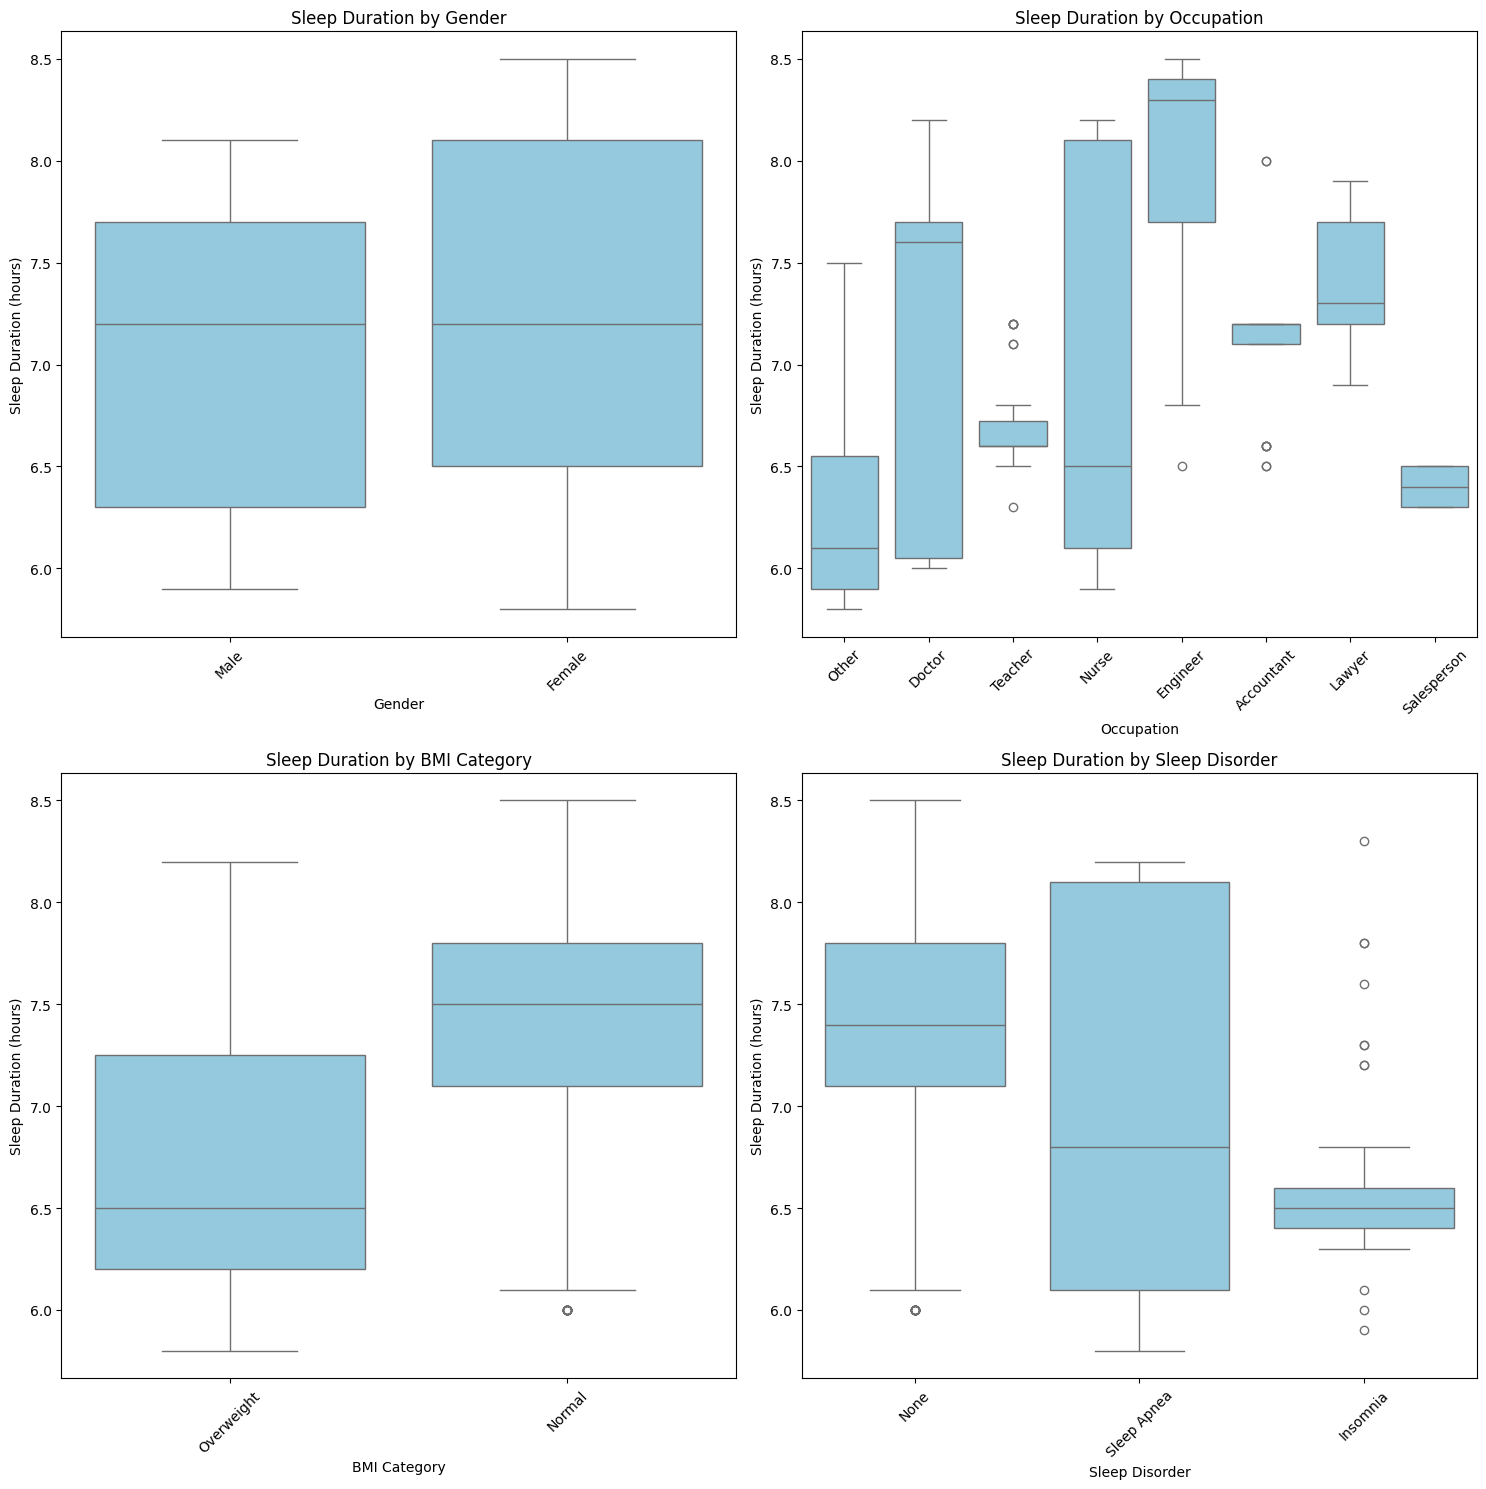

In [15]:
categorical_cols = ['Gender', 'Occupation', 'BMI Category', 'Sleep Disorder']

#Creating a suboutine to plot bar charts for categorical columns
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(15, 15))
plt.subplots_adjust(hspace=0.5, wspace=0.3)

axs = axs.flatten()

for ax, col in zip(axs, categorical_cols):
    sns.boxplot(data=df, x=col, y='Sleep Duration', ax=ax, color='skyblue')
    ax.set_title(F'Sleep Duration by {col}')
    ax.set_xlabel(col)
    ax.set_ylabel('Sleep Duration (hours)')
    ax.tick_params(axis='x', rotation=45)
plt.tight_layout()
plt.show()

## Observations:

#### Gender:
While median sleep duration is slightly higher in females than males, both genders have a similiar (IQR) Inter-Quartile Range, but females appear to have a slightly wider distribution. Hence, Gender might not be a strong predictor of sleep duration, but a small positive effect is visible for females.

#### Occupation: 
The sleep duration varies widely across the occupations, roles like Nurse and Engineer, seem to have a wider median, and wider IQRs. While others like Teacher. Salesperson, and Lawyer, show a lower median.

Even after taking into account, on the sample sizing, it can be seen in salesperson, the low sample size has resulted in an unrelaible box shape. (might consider merging it into "Others" to avoid misleading results). All in all, occuptation seems to have a moderate influence on sleep duration. (More testing can be done to show correlation)

#### BMI category: 
The individuals in the "Normal" BMI category, sleep more on average than those in the "Overweight" category. The Overweight group, also has a lower median, and a more compact distribution. This shows that there may be a negative association between BMI and Sleep Duration, consistent with current health literature.

#### Sleep Disorder: 
Those with no sleep disorders, have a higher median sleep duration, and those with Sleep Apnea, have a wider range, suggesting inconsistent sleep, and those with insomnia, have the lowest median and the most compressed duration. These can be seen as Sleep Disorders being strongly associated with reduced, or inconsistent sleep.

---

## Features (Numerical) by Sleep Disorder

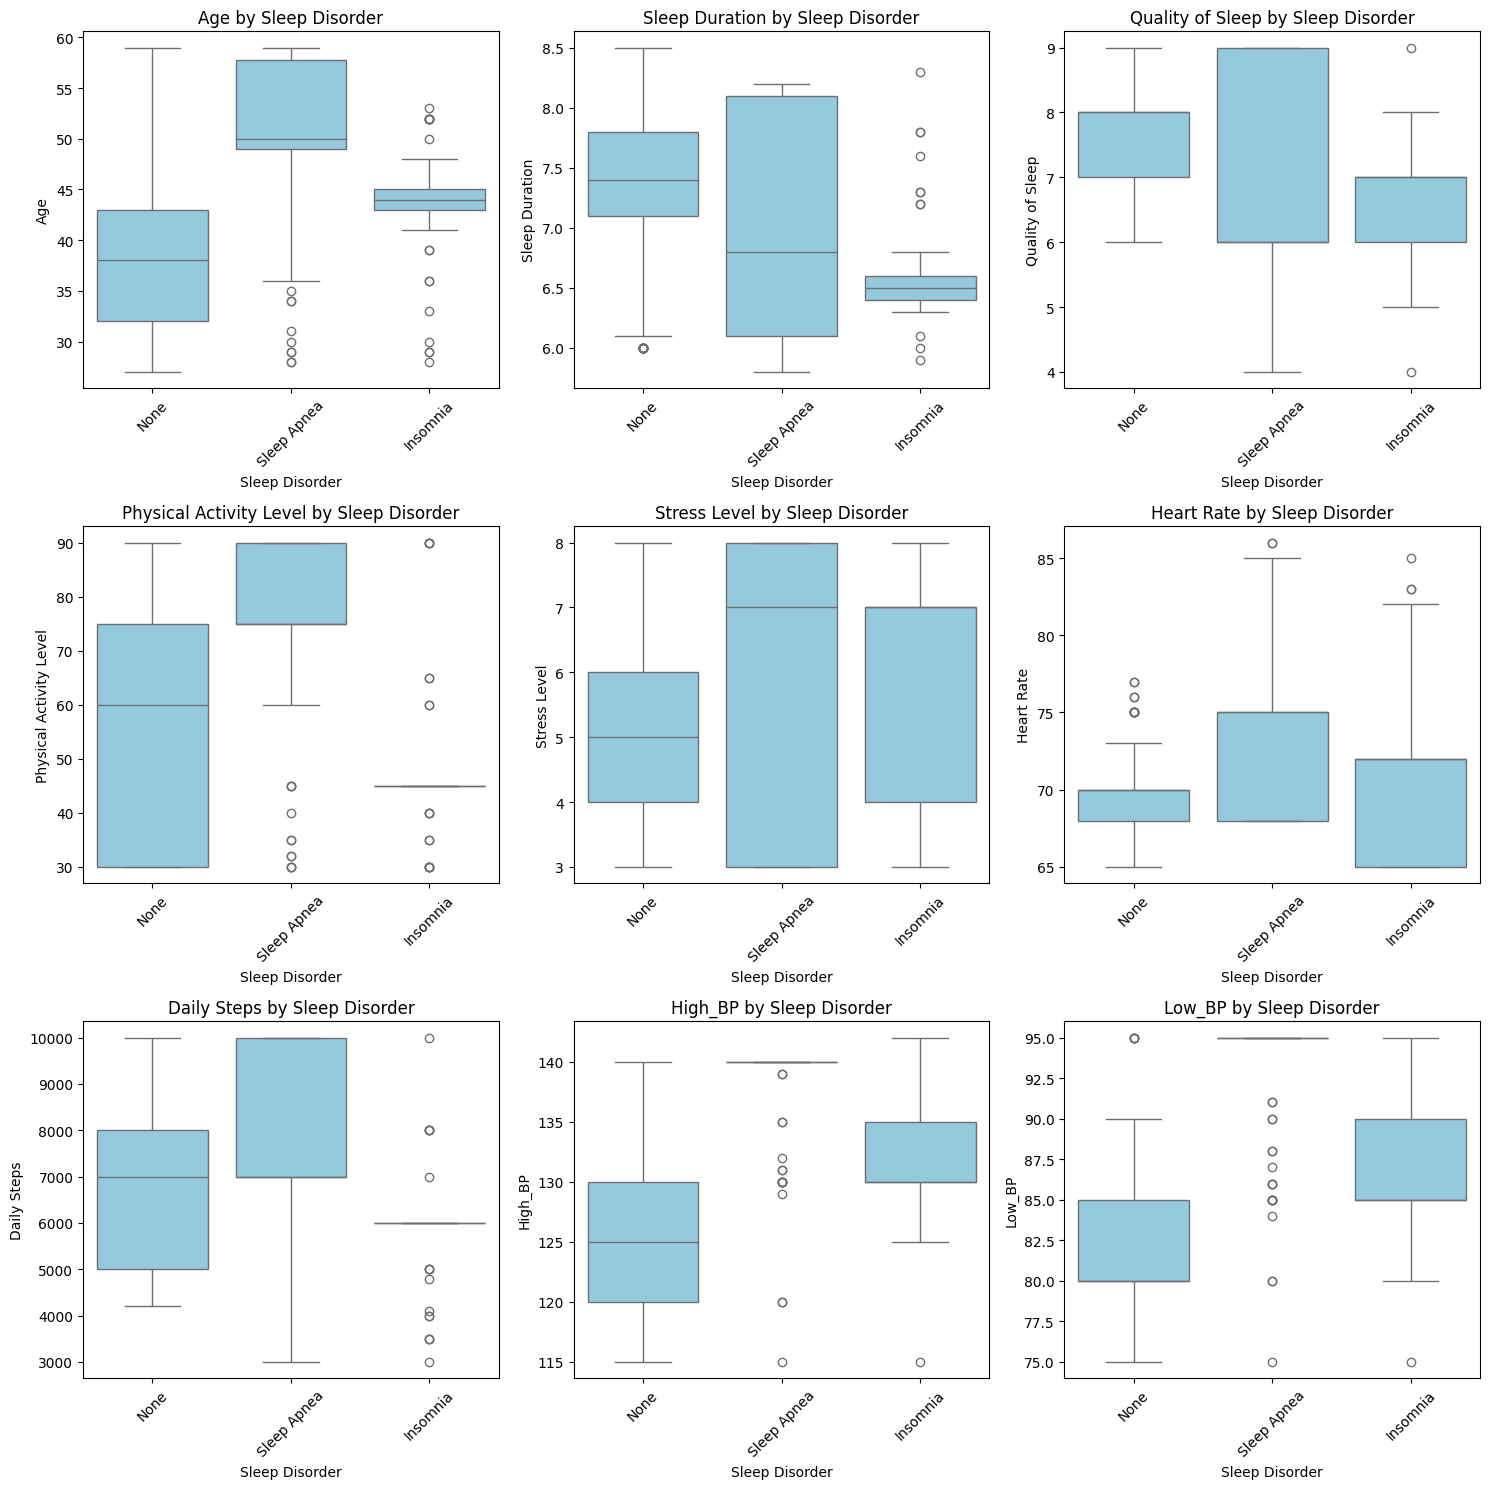

In [16]:
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

excluded_cols = ['Gender', 'Sleep Disorder'] 
features = [col for col in numerical_cols if col not in excluded_cols]

target = 'Sleep Disorder'

n = len(features)
ncols = 3
nrows = (len(features) + ncols - 1) // ncols
fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 5 * nrows))
plt.subplots_adjust(hspace=0.5, wspace=0.3)

axs = axs.flatten()

for ax, col in zip(axs, features):  
    sns.boxplot(data=df, x='Sleep Disorder', y=col, ax=ax, color='skyblue')
    ax.set_title(f'{col} by Sleep Disorder')
    ax.set_xlabel('Sleep Disorder')
    ax.set_ylabel(col)
    ax.tick_params(axis='x', rotation=45)
    
for j in range(len(features), len(axs)):
    axs[j].axis('off')  # Hide unused subplots
    
plt.tight_layout()
plt.show()

## Observations

#### Age:
- Highest median age (~55+), wide range for Sleep Apnea.
- Lower median age (~35-45), for None and Insomnia.

Sleep Apnea being more common in older individuals, while insomnia is seen to be distributed across younger and middle-aged groups.

#### Sleep Duration:
- Median around the 7.5 hours mark, for None.
- Median slightly higher (~8 hours), for Sleep Apnea.
- Has the lowest median (~6 hours), with a more narrow distribution, for Insomnia.

It can be seen that, insomniacs sleep less, with little variation. Surprisingly, it is interesting to note that sleep apnea sufferers report longer sleep, possibly due to disrupted but prolonged sleep cycles.

#### Quality of Sleep:
- Highest quality ratings, but with a large spread, for Sleep Apnea.
- Moderate sleep quality, for None.
- Significantly lower sleep quality, for Insomnia.

Poor sleep quality is strongly associated with insomnia, but sleep apnea shows a wide variability, might be due to the misperception of sleep quality, bias? in a sense, if users were asked to rate their sleep quality, there may be bias.

#### Physical Activity Level:
- Slightly higher physical activity overall, for Sleep Apnea.
- Has a broader activity range, for None.
- Has a noticeable lower physical activity level, a tighter distribution, for Insomnia.

This might suggest that Low activity, might actually be a contributor to, or result of insomnia. While Apnea patients might be compensating with more activity.

#### Stress Level:
- Has the highest and most consistent stress levels, for Sleep Apnea.
- Has the same elevated stress, but contains more variation, for Insomnia.
- Lowest stress overall, for None.

Stress being a common factor in both types of sleep disorder, especially for sleep apnea patients.

#### Heart Rate:
- Higher median rate, but a wider spread, for Sleep Apnea.
- Has a slightly lower rate, but a tighter range
- Has the lowest heart rate, for None.

Elevated heart rate is commonly linked with sleep apnea, and may reflect cardiovascular strain.

#### Daily Steps:
- Higher variability, but higher upper range, for Sleep Apnea.
- Moderate activity, for None.
- Lowest step count median, for Insomnia.

It has a low daily movement, correlates with insomnia. Apnea may not reduce mobility as much.

#### High Blood Pressure (Systolic):
- Highest median systolic BP, for Sleep Apnea.
- Moderate elevation, for Insomnia.
- Has the Lowest BP, for None.

Sleep apnea, shows a clear link to hypertension, which aligns with clinical literature.

#### Low Blood Pressure (Diastolic):
- Both are slightly elevated, for Sleep Apnea, and Insomnia.
- Lower values overall, for None.

Diastolic BP, is generally higher than those with sleep disorders, though less differentiated than systolic.

---

## Overall 
The boxplot reveals clear physiological and behavioural differences between those with and without sleep disorders. Insomnia is marked by low sleep duration, poor quality, low activity, and high stress, while Sleep Apnea is associated with older age, higher BP, heart rate, and stress levels. These variables are likely important predictors, in any sleep disorder classification model. 


---

## Features (Numerical) by Sleep Duration

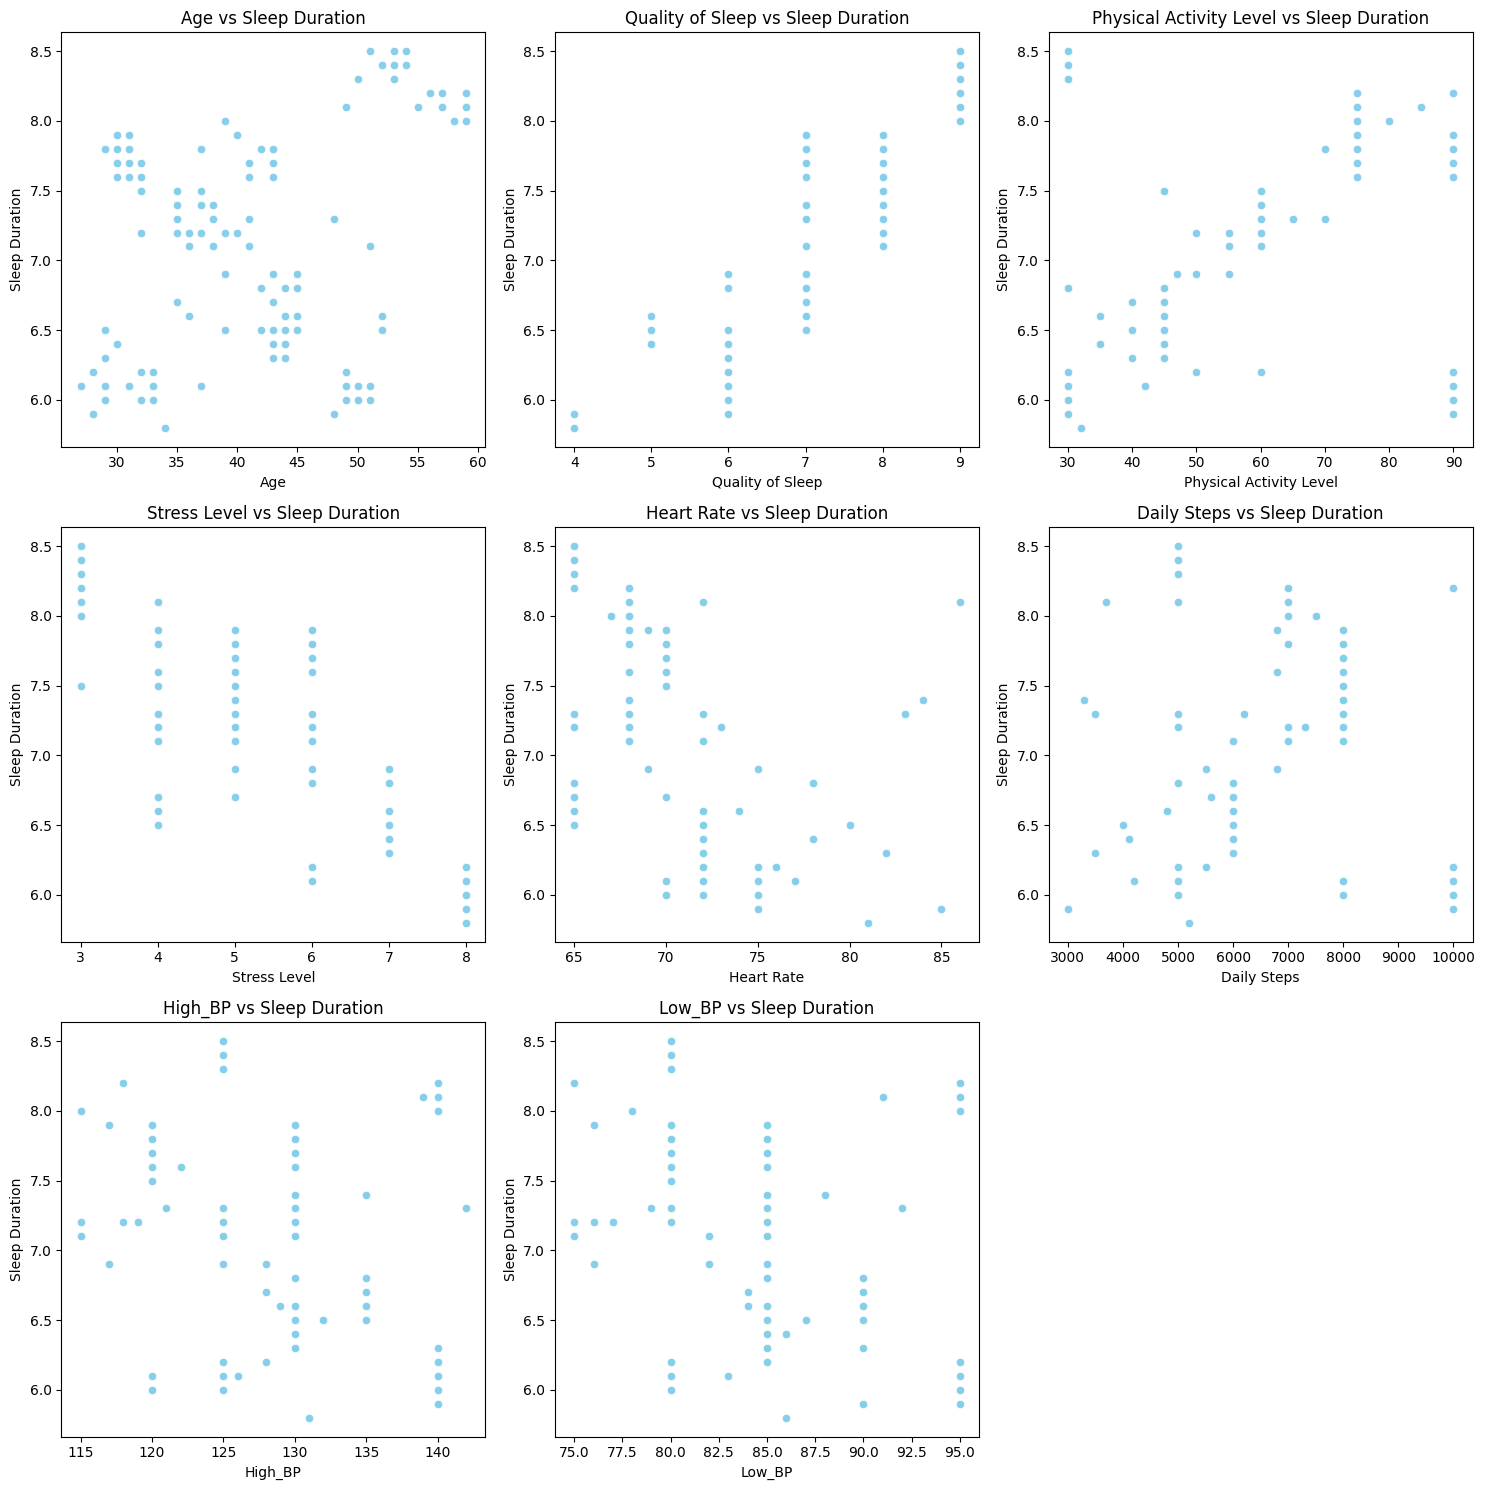

In [17]:
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()


exculded_cols = ['Sleep Duration', 'Gender', 'Sleep Disorder']
features = [col for col in numerical_cols if col not in exculded_cols]

target = 'Sleep Duration'

#create subroutine to plot scatter plots for numerical columns
n = len(features)
ncols = 3
nrows = (n + ncols - 1) // ncols  # Calculate number of rows needed
fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, nrows * 5))
plt.subplots_adjust(hspace=0.5, wspace=0.3)
axs = axs.flatten()

for i, col in enumerate(features):
    sns.scatterplot(data=df, x=col, y=target, ax=axs[i], color='skyblue')
    axs[i].set_title(f'{col} vs {target}')
    axs[i].set_xlabel(col)
    axs[i].set_ylabel(target)
    
for j in range(i + 1, len(axs)):
    axs[j].axis('off')  # Hide unused subplots
plt.tight_layout()
plt.show()


## Observations:

#### Age: 
Slight upwards trend, but scattered. It can be seen as Older individuals, might sleep slightly longer, but the variability is quite high. Has a weak to moderate postive correlation.

#### Quality of Sleep: 
Has a strong visible trend, higher quality aligns with longer sleep. Good quality sleep is tightly linked to longer sleep duration, having a very strong positive correlation.

#### Physical Activity Level: 
Has a mild upward trend, somewhat noisy, it can be seen as more activity, contributing to longer sleep, but isnt consistent. Has a weak positive correlation.

#### Stress Level: 
Has a clear downward trend, with higher stress levels being associated with shorter sleep durations, having a strong negative correlation.

#### Heart Rate: 
A slight downward trend, people with higher resting heart rate may sleep less, might be due to stress or physical factors. Has a moderate negative correlation.

#### Daily Steps: 
There is some spread, and a slight upward drift, can be seen that more steps a day may help sleep, but the relationship is weak. Weak positive correlation.

#### High BP: 
No clear trend, as the points are dispersed. has a very weak, or no correlation.

#### Low BP: 
Has a slight downward drift, but very weak. Can be seen as a very weak negative correlation, or none at all.

---

## Additional Plotting

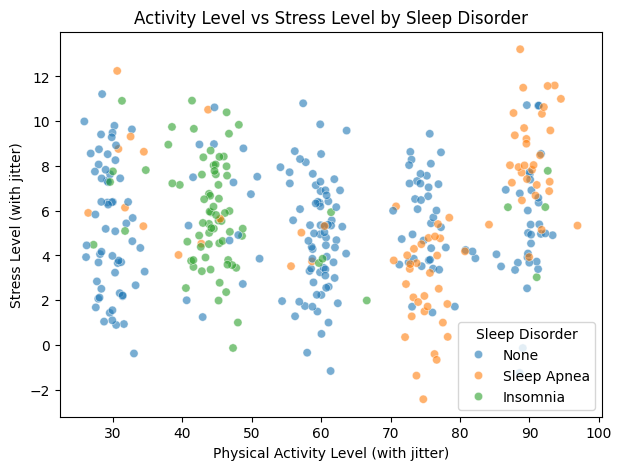

In [18]:
#Scatter plot of Physical Activity Level vs Stress Level (Jittered) by Sleep Disorder
df['Activitylitter'] = df['Physical Activity Level'] + np.random.normal(0, 2, size=len(df))  # Adding slight noise for better visibility
df['StressLitter'] = df['Stress Level'] + np.random.normal(0, 2, size=len(df))  # Adding slight noise for better visibility

#Plot wth jitter and alpha for better visibility
plt.figure(figsize=(7, 5))
sns.scatterplot(data=df, x='Activitylitter', y='StressLitter', hue='Sleep Disorder', alpha=0.6)
plt.title('Activity Level vs Stress Level by Sleep Disorder')
plt.xlabel('Physical Activity Level (with jitter)')
plt.ylabel('Stress Level (with jitter)')
plt.legend(title='Sleep Disorder')
plt.show()

## Observations:

"None" the healthy sleepers, is distributed across the full activity, and stress range, but is especially concentrated around the moderate activity (40-70), and moderate stress (4-6). This can be seen as healthy sleepers maintaining a balanced stress and activity level, safe to assume that the most "typical range" for no sleeping disorder is ~50 activity, and ~5 stress. 

"Sleep Apnea" on the other hand, has high activity levels, mostly above (70), with a low to moderate stress (concentrated <6). This may reflect a subset of people who are physically active but still suffer from sleep-related breathing issues, and it could suggest physiological causes, not explained by stress.

"Insomnia" has a low activity of (25-50), and high stress (6-12), with a few outliers at 13+. A clear cluster of high stress, low activity individuals can be seen, suggesting a behavioural, or psychological contributors to insomnia (stress, sedentary habits).

---

## Feature Correlation Analysis (Heatmap)

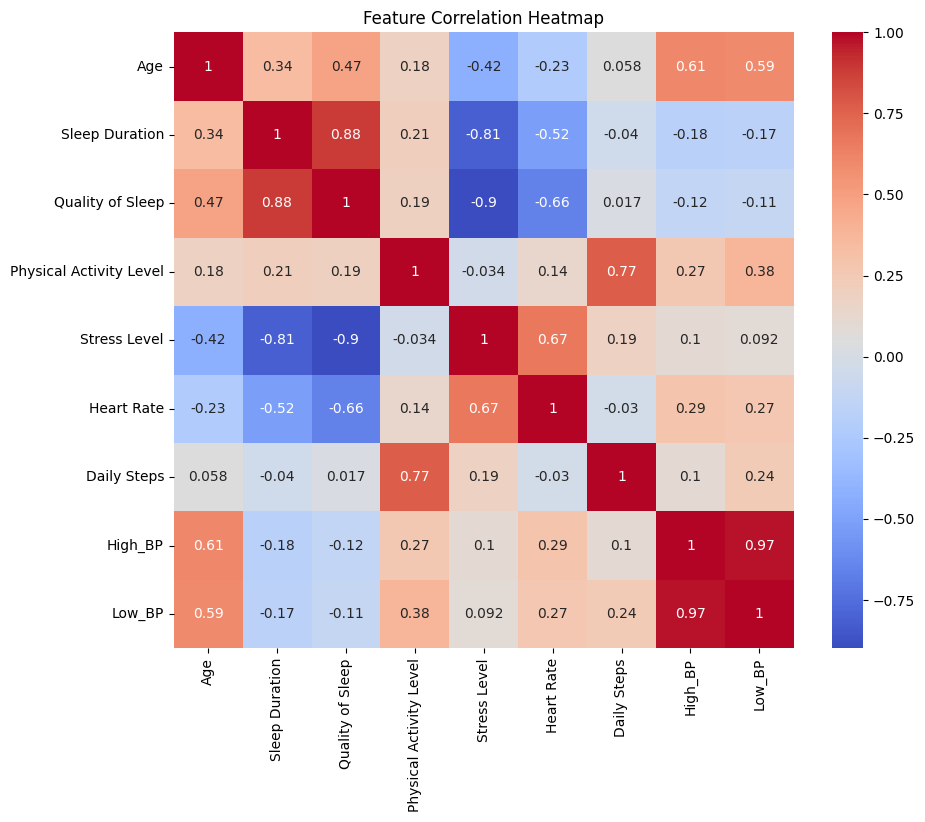

In [19]:
#Removing the temporary jitter columns (these were added for visualization purposes)
df.drop(columns=['Activitylitter', 'StressLitter'], inplace=True)

#clip stress level to realistic values after seeing the distribution
df['Stress Level'] = df['Stress Level'].clip(lower=0, upper=10)

#Correlation heatmap (numerical)
numerical_df = df.select_dtypes(include=['float64', 'int64'])
plt.figure(figsize=(10, 8))
sns.heatmap(numerical_df.corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()

## Strongest Positive Correlations:

#### Sleep Duration and Quality of Sleep (r= +0.88)
- very strong relationship, and longer sleep is clealy linked with better sleep quality.
- confirms that these two feature may be redundant in some models.

#### High_BP and Low_BP (r= +0.97)
- Almost perfect correlation, rising together.

#### Stress Level and Heart Rate (r= +0.67)
- High stress is associated with higher heart rates, aligning with physiological expectations.
- A good indicator of how stress affects ones physical health.

#### Daily Steps and Physical Activity Level (r= +0.77)
- Indicates consistency, more daily steps result in higher reported physical activity.
- Reflects good data quality from activity tracking.

---

## Strongest Negative Correlations

#### Stress Level and Quality of Sleep (r= -0.90)
- An extremely strong inverse relationship.
- Higher stress levels drastically reduce percieved sleep quality.
- Has potential to be a key explantory variable in sleep disorder modeling.

#### Stress Level and Sleep Duration (r= -0.81)
- Higher stress levels also significantly reduces total sleep time.
- Strongly supports that stress is a core risk factor, when it comes to insomnia, or poor sleep.

#### Quality of Sleep and Heart Rate (r= -0.66)
- Poor sleep quality, is associated with elevated heart rates.
- This suggests that physical restlessness, or any underlying anxiety.

---

## Moderate Correlations

#### Age and High_BP/Low_BP (r= +0.61/+0.59)
- As age increases, blood pressure tends to rise, aligning with clinical patterns.

#### Sleep Duration and Heart rate (r= -0.52)
- Less sleep is linked to higher heart rates, another indicator of stress, or signs of restlessness.

####  Age and Quality of Sleep (r= +0.47)
- This is somewhat insightful, and surprising, as older participants may report slightly better sleep quality, or younger ones being more sensitive to sleep issues.

#### Physical Activity
- Shows weak, to no correlation with sleep or stress.
-Suggesting that subjective activity rating may be inconsistent, or has other lifestyle variables having an influence.

---

## Summary
- Stress, sleep, and heart rate, form a triangle of negative, and positive feedback loops.
- Physical activity levels may not be very meaningful alone, unless paired with daily steps. (Will be done later on, for further analysis)
- Several features like Quality of sleep, Stress, and Sleep Duration have nonlinear, or compounded effects, making them ideal targets for predictive modeling of the sleep disorders.





---

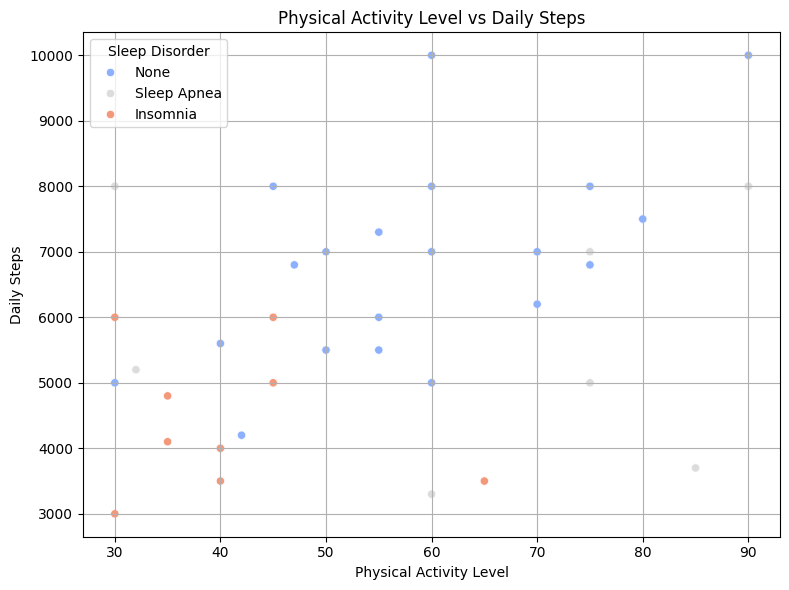

In [20]:
#Scatter plot of Physical Activity Level vs Daily Steps
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Physical Activity Level', y='Daily Steps', hue='Sleep Disorder', palette='coolwarm')
plt.title('Physical Activity Level vs Daily Steps')
plt.xlabel('Physical Activity Level')
plt.ylabel('Daily Steps')
plt.grid(True)
plt.tight_layout()
plt.show()

## Observations:
- Higher physical activity is generally associated with more daily steps, but the relationship is strongest and most consistent, among the individuals without sleep disorders.
- Insomnia shows the lowest levels of both metrics, reinforcing earlier findings, where it is linked to reduced physical engagement.
- While the Sleep Apnea data is more varied, it reflects less relaible physical patterns, might be due to disrupted routines, or subjective perception differences.

---

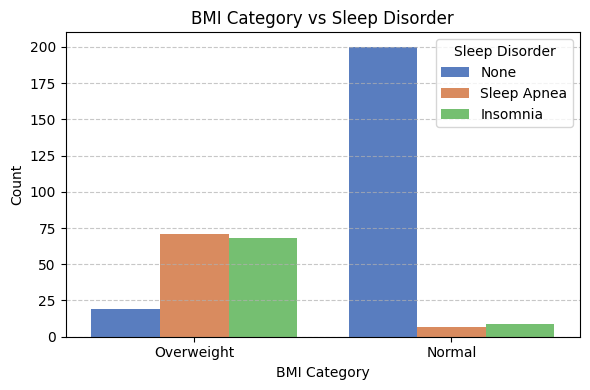

In [21]:
#Count plot of BMI Category vs Sleep Disorder
#BMI categorization
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='BMI Category', hue='Sleep Disorder', palette='muted')
plt.title('BMI Category vs Sleep Disorder')
plt.xlabel('BMI Category')
plt.ylabel('Count')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='Sleep Disorder')
plt.tight_layout()
plt.show()

## Observations:
- A large majority of the individuals with a Normal BMI, reported no sleep disorders.
- Not only that, but among those with Overweight BMI, theres a sharp increases in both Sleep Apnea, and Insomnia cases.
- Based on that, Sleep Apnea, and Insomnia appears almost equally prevalent within the Overweight category.
- This strongly suggests that a strong association between higher BMI, and the likelihood of sleep disorders, especially with sleep apnea, which is consistent medically.

Individuals with higher BMI, are more likely to suffer from sleep disorders, this itself aligns with clinical findings. That obesity can  obstruct airways, contirbuting to sleep apnea. Maintaining a healthy weight may be protective against such disorders.

---

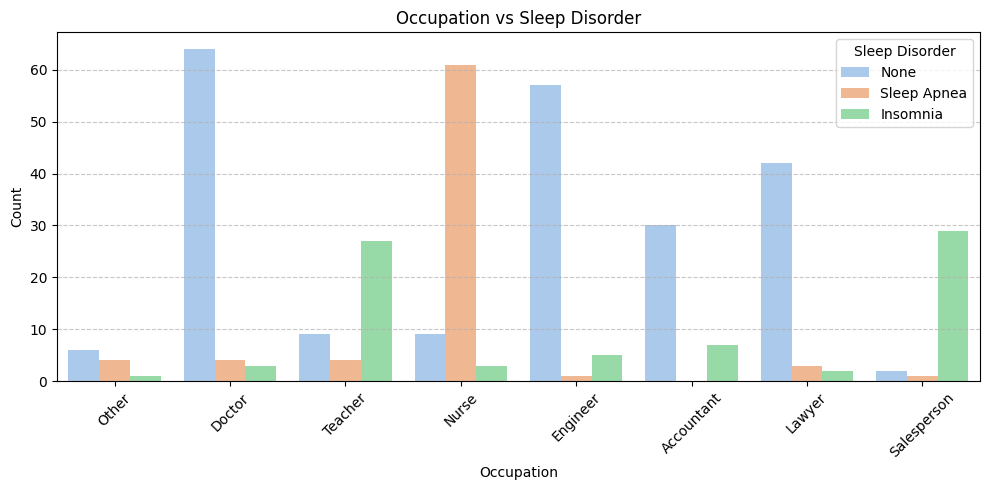

In [22]:
#Count plot of Occupation vs Sleep Disorder
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='Occupation', hue='Sleep Disorder', palette='pastel')
plt.title('Occupation vs Sleep Disorder')
plt.xticks(rotation=45)
plt.xlabel('Occupation')
plt.ylabel('Count')
plt.legend(title='Sleep Disorder')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## Observations:

- Doctors and Engineers show high levels of participants with no sleep disorders, suggesting that their sleep may be less affected.
- Nurses on the other hand, show a very high number of Sleep Apnea cases, which is nearly all of the nurses. 
- Salespeople and Teachers, have a noticeably higher insomnia cases compared to other occupations.

Certain highly stressful, or irregular work hour jobs, such as nursing and sales, can be seen to be more prone to sleep disorders, Nurses in particular show a disproportionately high rate of Sleep Apnea, possibly due to the shift work, and stress. Meanwhile, Insomnia appears more frequently among Salesperson, and Teachers, which may reflect mental workload or other lifestyle stressors.

---

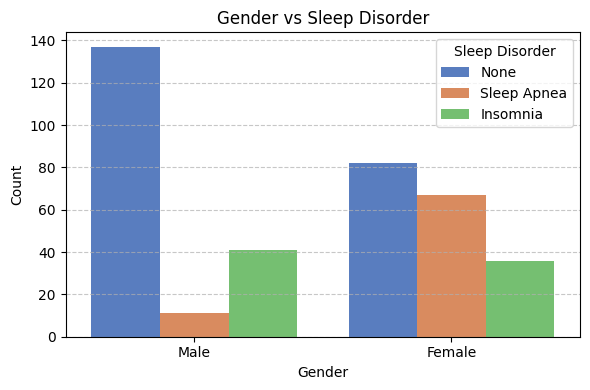

In [23]:
#Gender vs Sleep Disorder
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Gender', hue='Sleep Disorder', palette='muted')
plt.title('Gender vs Sleep Disorder')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='Sleep Disorder')
plt.tight_layout()
plt.show()

## Observations:

#### Males
- The large majority, reports no sleep disorders.
- Fewer males, have Sleep Apnea.
- Insomnia is present among males, but not dominant.

#### Females
- Lower number with no sleep disorder as compared to the males.
- Noticeably more likely to report Sleep Apnea.
- Slightly lower insomnia cases than males.

Males are more likely to report having no sleep disorders. However, females on the other hand, show a much higher incidence of Sleep Apnea, which could be due to biological differences, hormonal cycles, or increased stress, or sleep interuptions. Insomnia, though appears fairly balanced across both genders but is slightly higher in males.

---

## Encoding and Scaling

In [24]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
df['Gender'] = LabelEncoder().fit_transform(df['Gender'])
df = pd.get_dummies(df, columns=['Occupation', 'BMI Category'], drop_first=True)

#Encode the target variable 'Sleep Disorder'
le = LabelEncoder()
df['Sleep Disorder'] = le.fit_transform(df['Sleep Disorder'])  # Sleep Apnea = 1, Insomnia = 0


#Clip extreme values again for safety
df['Stress Level'] = df['Stress Level'].clip(lower=0, upper=10)
df['Physical Activity Level'] = df['Physical Activity Level'].clip(lower=0, upper=100)

num_cols = ['Age', 'Sleep Duration', 'Quality of Sleep', 'Stress Level',
            'Physical Activity Level', 'Daily Steps', 'Heart Rate', "High_BP", "Low_BP"]
scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

Categorical encoding is quite essential for Machine Learning (ML). The Feature scaling helps gradeitn-based models, and ensures equal importance.

---

## <Section B - Model Building and Evaluation>

In [25]:
X = df.drop('Sleep Disorder', axis=1)
y = df['Sleep Disorder']

Seperating features (x) from the target (y) is essential for supervised learning, the model then learns the patterns from x to predict y.

---

In [26]:
#Export cleaned data
df.to_csv('cleaned_sleep_data.csv', index=False)

Saving the cleaned dataset, allows for easy reuse, or submission without the preprocessing steps being repeated.

---

## Train-Test Split

In [27]:
from sklearn.model_selection import train_test_split

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Display the shapes of the train and test sets
print("Training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)


Training set shape: (299, 18)
Test set shape: (75, 18)


Splitting the data, ensures fair model evaluation. Stratification, maintains the proportion of sleep disorders classes in both the train and test sets. The dataset is split into training, testing subsets (80/20) to evaluate generalization performance. (stratify=y) ensures class distribution is preserved in both splits, crucial for imbalanced classes.

---

## Model Training (Untuned Baselines)

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, class_weight='balanced'),
    'Decision Tree': DecisionTreeClassifier(random_state=42, class_weight='balanced'),
    'Random Forest': RandomForestClassifier(random_state=42, class_weight='balanced'),
}

baseline_results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    
    acc = accuracy_score(y_test, preds)
    print(f"Model: {name}")
    print("Accuracy:", acc)
    print("Classification Report:\n", classification_report(y_test, preds))
    
    # Store results for later comparison
    baseline_results[name] = {
        'model': model,
        'accuracy': acc,
    }

Model: Logistic Regression
Accuracy: 0.9333333333333333
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.80      0.86        15
           1       1.00      0.95      0.98        44
           2       0.80      1.00      0.89        16

    accuracy                           0.93        75
   macro avg       0.91      0.92      0.91        75
weighted avg       0.94      0.93      0.93        75

Model: Decision Tree
Accuracy: 0.8666666666666667
Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.93      0.80        15
           1       1.00      0.86      0.93        44
           2       0.76      0.81      0.79        16

    accuracy                           0.87        75
   macro avg       0.82      0.87      0.84        75
weighted avg       0.89      0.87      0.87        75

Model: Random Forest
Accuracy: 0.9466666666666667
Classification Report:
           

Training the baseline models, can help to assess the performance before tuning, (class_weight='balanced) handles any class imbalance, and then the results (accuracy) and classification report, will used to compare against the tuned version, to highlight improvements, or errors.

---

## Hyperparameter Tuning (GridSearchCV)

In [29]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

dt_params = {
    "max_depth": [5, 10, None],
    "min_samples_split": [2, 4],
    "min_samples_leaf": [1, 2],
    "criterion": ["gini", "entropy"]
}

# Initialize the Decision Tree Classifier
dt_grid = GridSearchCV(
    estimator=DecisionTreeClassifier(random_state=42, class_weight='balanced'),
    param_grid=dt_params,
    scoring='accuracy',
    cv=5,
    n_jobs=-1
)

dt_grid.fit(X_train, y_train)

print("Best parameters for Decision Tree:", dt_grid.best_params_)
print("Best cross-validation score for Decision Tree:", dt_grid.best_score_)

Best parameters for Decision Tree: {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 4}
Best cross-validation score for Decision Tree: 0.866271186440678


By tuning the Decision Tree parameters, it helps to prevent overfitting, or underfitting and find the optimal depth and splits for generalization.

---

In [30]:
from sklearn.ensemble import RandomForestClassifier
rf_params = {
    "n_estimators": [100, 200],
    "max_depth": [10, 20, None],
    "min_samples_split": [2, 5],
    "min_samples_leaf": [1, 2],
    "criterion": ["gini", "entropy"],
}

#initialize the Random Forest Classifier
rf_grid = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42, class_weight='balanced'),
    param_grid=rf_params,
    scoring='accuracy',
    cv=5,
    n_jobs=-1
)

rf_grid.fit(X_train, y_train)

print("Best parameters for Random Forest:", rf_grid.best_params_)
print("Best cross-validation score for Random Forest:", rf_grid.best_score_)

Best parameters for Random Forest: {'criterion': 'gini', 'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}
Best cross-validation score for Random Forest: 0.8829378531073446


Random Forest, having more parameters. Tuning ensures better ensembling performance, by optimizing tree diversity, and depth.

Overall, the GridSearchCV systematically searches over the combinations of hyperparameters, to improve the generalisation accuracy, using 5-fold cross-validation, ensuring a fair and optimized model selection.

---

## Model Training (Tuned)

In [31]:
tuned_models = {
    'Decision Tree': dt_grid.best_estimator_,
    'Random Forest': rf_grid.best_estimator_,
}
# Evaluate tuned models
for name, model in tuned_models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    
    print(f"Tuned Model: {name}")
    print("Accuracy:", accuracy_score(y_test, preds))
    print("Classification Report:\n", classification_report(y_test, preds))

Tuned Model: Decision Tree
Accuracy: 0.9466666666666667
Classification Report:
               precision    recall  f1-score   support

           0       0.83      1.00      0.91        15
           1       1.00      0.98      0.99        44
           2       0.93      0.81      0.87        16

    accuracy                           0.95        75
   macro avg       0.92      0.93      0.92        75
weighted avg       0.95      0.95      0.95        75

Tuned Model: Random Forest
Accuracy: 0.9733333333333334
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.87      0.93        15
           1       1.00      1.00      1.00        44
           2       0.89      1.00      0.94        16

    accuracy                           0.97        75
   macro avg       0.96      0.96      0.96        75
weighted avg       0.98      0.97      0.97        75



After the hyperparameters optimizations, the best models are re-trained for better generalization, and performance on unseen data. This step accesses the performance improvement from hyperparameter tuning, compared to the baseline models.

---

## Gradient Boosting

In [32]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc

gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train, y_train)
gb_preds = gb_model.predict(X_test)

#Accuracy and classification report for Gradient Boosting
gb_train_acc = accuracy_score(y_train, gb_model.predict(X_train))
gb_test_acc = accuracy_score(y_test, gb_preds)

print("Gradient Boosting - Training Accuracy: {:.4f}, Test Accuracy: {:.4f}".format(gb_train_acc, gb_test_acc))
print("Classification Report:\n", classification_report(y_test, gb_preds))

Gradient Boosting - Training Accuracy: 0.9197, Test Accuracy: 0.9600
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.87      0.90        15
           1       1.00      1.00      1.00        44
           2       0.88      0.94      0.91        16

    accuracy                           0.96        75
   macro avg       0.94      0.93      0.94        75
weighted avg       0.96      0.96      0.96        75



---

## Hyperparameter Tuning (GridSearchCV) - Gradient Boosting

In [33]:
# Define the parameter grid for Gradient Boosting
gb_params = {
    "n_estimators": [100, 150, 200],
    "learning_rate": [0.05, 0.1],
    "max_depth": [3, 4],
    "min_samples_split": [2],
    "min_samples_leaf": [1],
}

# Initialize the model
gb_clf = GradientBoostingClassifier(random_state=42)

# GridSearchCV for Gradient Boosting
gb_grid = GridSearchCV(
    estimator=gb_clf,
    param_grid=gb_params,
    scoring='accuracy',
    cv=5,
    n_jobs=-1
)

# Fit on the training data
gb_grid.fit(X_train, y_train)

# Print the best parameters and score
print("Best parameters for Gradient Boosting:", gb_grid.best_params_)
print("Best cross-validation score for Gradient Boosting:", gb_grid.best_score_)

# Evaluate the best model on the test set
best_gb_model = gb_grid.best_estimator_
gb_preds = best_gb_model.predict(X_test)

print("Gradient Boosting - Test Accuracy:", accuracy_score(y_test, gb_preds))
print("Classification Report:\n", classification_report(y_test, gb_preds))

Best parameters for Gradient Boosting: {'learning_rate': 0.05, 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 150}
Best cross-validation score for Gradient Boosting: 0.8896610169491526
Gradient Boosting - Test Accuracy: 0.96
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.87      0.90        15
           1       1.00      1.00      1.00        44
           2       0.88      0.94      0.91        16

    accuracy                           0.96        75
   macro avg       0.94      0.93      0.94        75
weighted avg       0.96      0.96      0.96        75



---

## Model Comparison - Accuracy and Confusion Matrix

In [34]:
models['Gradient Boosting'] = gb_model
# Adding the Gradient Boosting model to the models dictionary

tuned_models['Gradient Boosting'] = best_gb_model
# Adding the best Gradient Boosting model to the tuned models dictionary

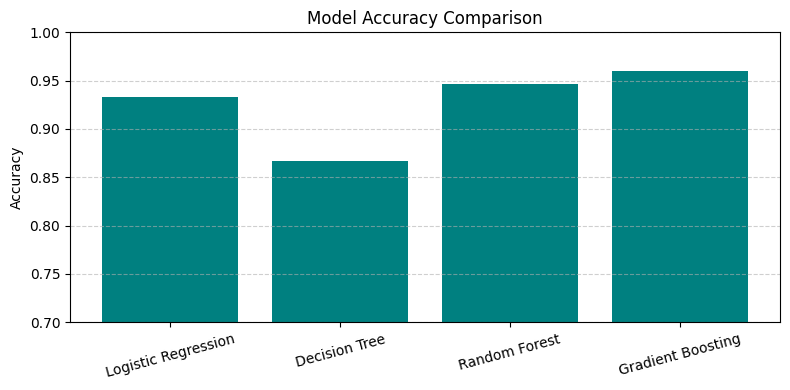

In [35]:
#Accuracy and confusion matrix comparison
import matplotlib.pyplot as plt

model_scores = {
    'Logistic Regression': accuracy_score(y_test, models['Logistic Regression'].predict(X_test)),
    'Decision Tree': accuracy_score(y_test, models['Decision Tree'].predict(X_test)),
    'Random Forest': accuracy_score(y_test, models['Random Forest'].predict(X_test)),
    'Gradient Boosting': accuracy_score(y_test, models['Gradient Boosting'].predict(X_test)),
}

plt.figure(figsize=(8, 4))
plt.bar(model_scores.keys(), model_scores.values(), color='teal')
plt.ylim([0.7, 1])
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.xticks(rotation=15)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

## Observation: 

#### Gradient Boosting:
- Is the top performer, with the highest accuracy (~96%), indicating its ability to capture complex patterns, and interactions in the dataset.
- Likely due to its sequential tree building and regularization parameters.

#### Random Forest and Logistic Regression:
- Both models performed very similarly, (~94.5%).
- Logistic Regressions high accuracy, is quite surprsing for a linear model, which suggests that the dataset may be linearly separable, or has strong signal features.
- Random Forest adds robustness and handles feature interactions well.

#### Decision Tree:
- Has the lowest accuracy of (~86%)
- The single Decision Tree underperforms compared to its ensemble conterpart (Random Forest).
- Likely due to overfitting, commonly seen in standalone trees without pruning or ensemble methods.

#### Overall:
However, it is still early to make a decision, but currently Gradeint Boosting stands as the best model so far.
- But further down, ROC-AUC
- To consider model complexity vs performance, as Logistic Regression is simpler, but interpretable. While Gradient Boosting is more complex but powerful.

---

## Tuned Model Accuracy

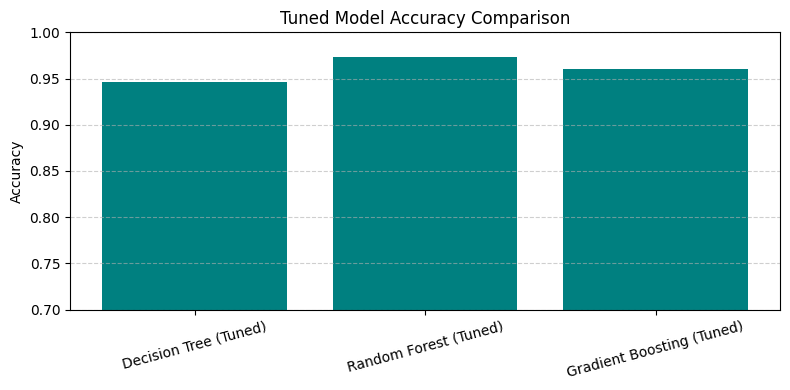

In [36]:
tuned_model_scores = {
    'Decision Tree (Tuned)': accuracy_score(y_test, tuned_models['Decision Tree'].predict(X_test)),
    'Random Forest (Tuned)': accuracy_score(y_test, tuned_models['Random Forest'].predict(X_test)),
    'Gradient Boosting (Tuned)': accuracy_score(y_test, tuned_models['Gradient Boosting'].predict(X_test)),
}

plt.figure(figsize=(8, 4))
plt.bar(tuned_model_scores.keys(), tuned_model_scores.values(), color='teal')
plt.ylim([0.7, 1])
plt.title('Tuned Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.xticks(rotation=15)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

## Observation:
- Tuning Decision Tree improved it drastically, it was the weakest untuned, but managed to reach solid performance after.
- Random Forest benefited slightly from the tuning.


---

## Confusion Matrix (Untuned)

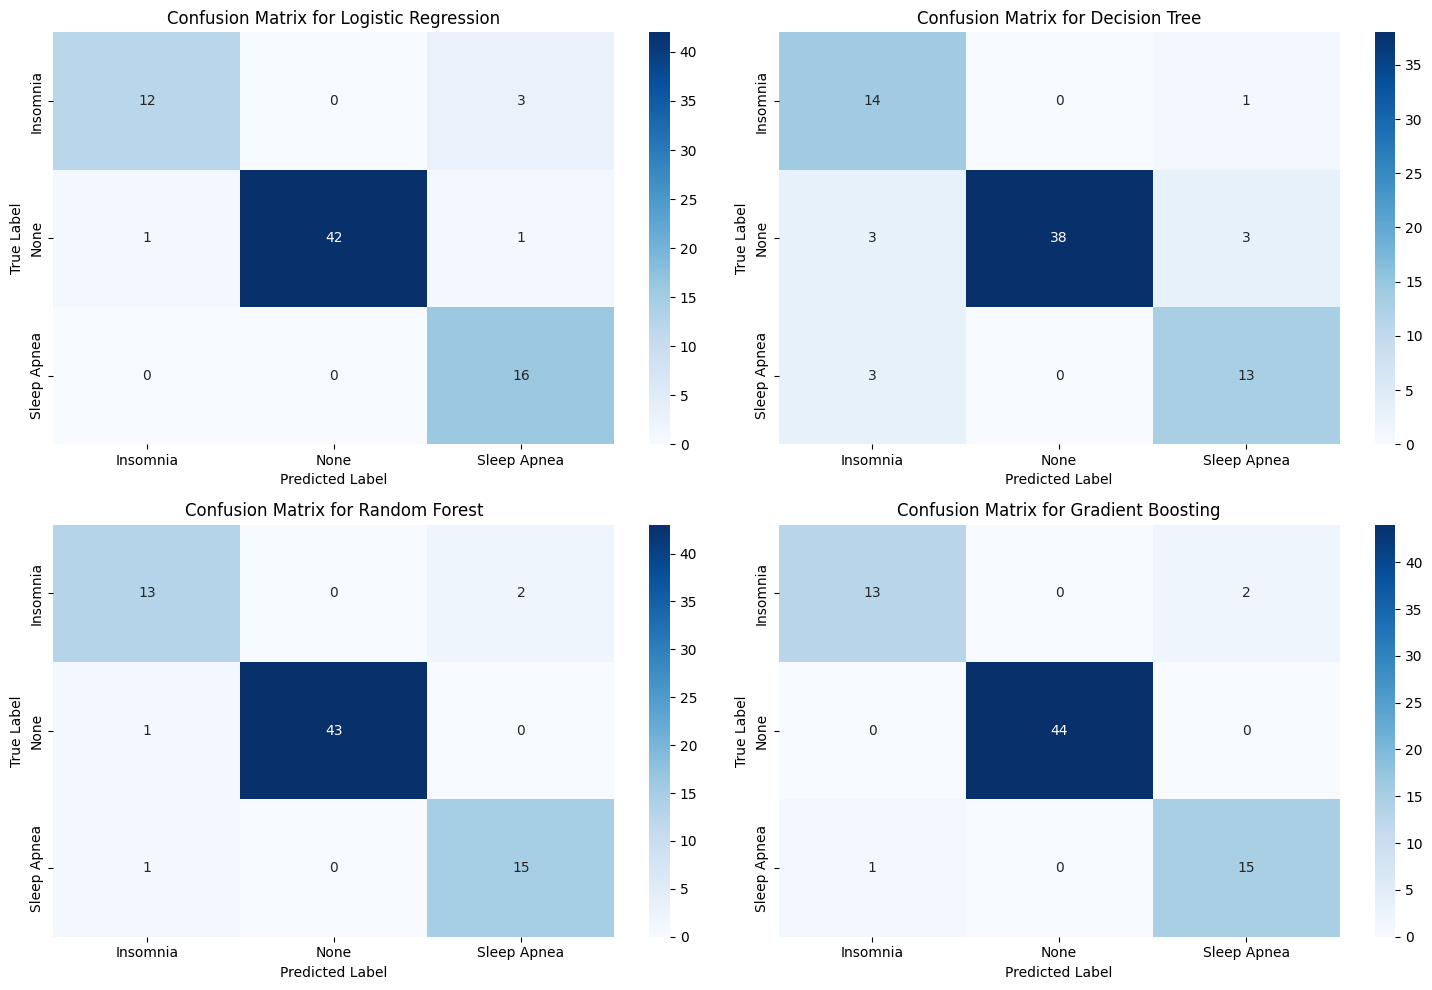

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

# Confusion Matrices (Combined Heatmaps)
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

model_lists = list(models.items()) + [('Gradient Boosting', gb_model)]
axs = axs.flatten()


for ax, (name, model) in zip(axs, model_lists):
    preds = model.predict(X_test)
    cm = confusion_matrix(y_test, preds)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax,
                xticklabels=le.classes_, yticklabels=le.classes_)
    ax.set_title(f'Confusion Matrix for {name}')
    ax.set_xlabel('Predicted Label')
    ax.set_ylabel('True Label')
plt.tight_layout()
plt.show()

## Observations:

#### Logistic Regression:
- True insomnia. 13 correct, 2 as Sleep Apnea
- True None: 42 correct, 1 wrong to each class
- True Sleep Apnea: 16 correct (perfect)

#### Strengths: 
- 1 error per class, but very balanced. 
- Excellent with "None" and "Sleep Apnea".

#### Weakness:
- Slight confusion between insomnia, and Sleep Apnea (2 misclassifications)

---

#### Decision Tree:
- True Insomnia: 14 correct, 1 as Sleep Apnea
- True None: 38 correct, 3 as Insomnia, 3 as Apnea
- True Sleep Apnea: 13 correct, 3 as Insomnia

#### Strengths:
- Not bad with Insomnia
- Acceptable Apnea detection

#### Weakness:
- Misclassifies "None" into both other categories, lowers general precision.
- Apnea is misclassified, into insomnia 3x, which may affect recall for Apnea.

---

#### Random Forest:
- True Insomnia: 13 correct, 2 as Sleep Apnea
- True None: 43 correct, 1 as Insomnia
- True Sleep Apnea: 15 correct, 1 as Insomnia

#### Strengths:
- Consistently good across all classes
- Slightly better generalisation than Decision Tree

#### Weakness:
- A few confusion points, just 1-2 cases though (small)

---

#### Gradient Boosting:
- True Insomnia: 13 correct, 2 as Sleep Apnea
- True None: 44 correct (perfect)
- True Sleep Apnea: 15 correct, 1 as Insomnia

#### Strengths:
- Perfect "None" classification
- Most balanced and precise

#### Weakness:
- 1 error each for Insomnia and Apnea

---

#### Overall:
- Gradient Boosting is the strongest performer, with nearly perfect classification.
- Random Forest is a close second, just behind Gradient Boosting.
- Logistic Regression is quite solid.
- Decision Tree, struggles the most, especially with the "None" class.

---

## Confusion Matrix (Tuned)

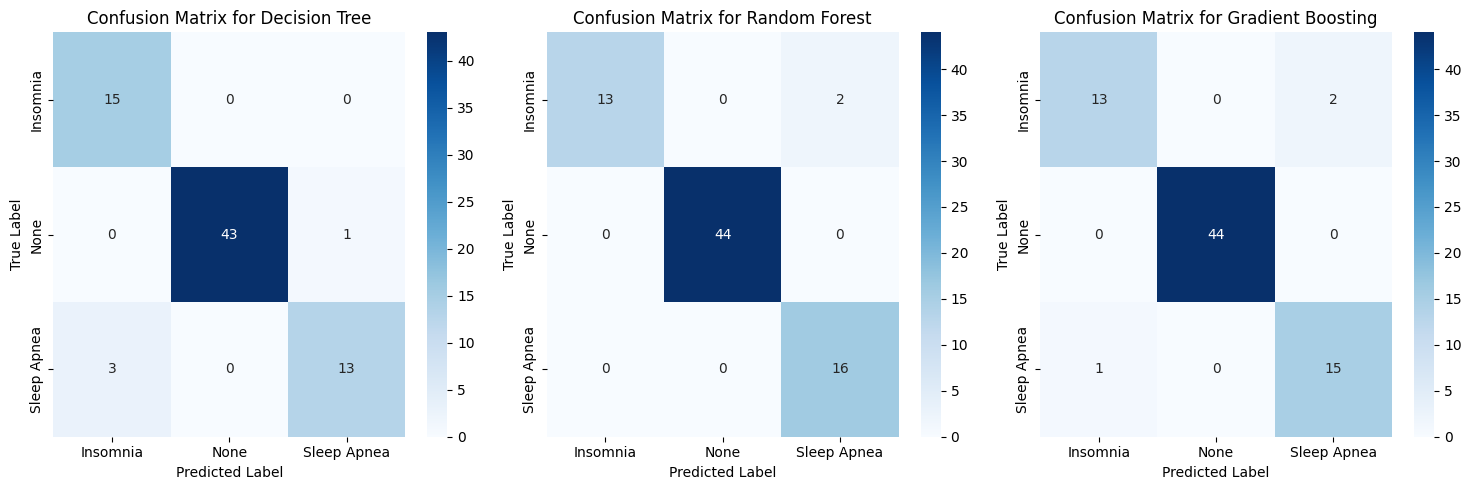

In [38]:
# Confusion Matrices (Combined Heatmaps)
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

model_lists = list(tuned_models.items()) + [('Gradient Boosting', best_gb_model)]
axs = axs.flatten()


for ax, (name, model) in zip(axs, model_lists):
    preds = model.predict(X_test)
    cm = confusion_matrix(y_test, preds)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax,
                xticklabels=le.classes_, yticklabels=le.classes_)
    ax.set_title(f'Confusion Matrix for {name}')
    ax.set_xlabel('Predicted Label')
    ax.set_ylabel('True Label')
plt.tight_layout()
plt.show()

## Observations:
- Random Forest (Tuned) performs the best in terms of balanced performance, especially for Apnea detection.
- Gradient Boosting is very close but made a slight error in Apnea classification.
- While the Decision Tree, though strong on insomnia, is more prone to misclassifying Apnea, which may not be ideal in a medical setting.


#### Overall:
- Based on just these results, for overall accuracy, Random Forest (Tuned)


---

## Feature Importance (Untuned)

C:\Users\koziy\AppData\Local\Temp\ipykernel_41052\120538660.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=importance_df, x='Importance', y='Feature', ax=ax, palette='viridis')
C:\Users\koziy\AppData\Local\Temp\ipykernel_41052\120538660.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=importance_df, x='Importance', y='Feature', ax=ax, palette='viridis')
C:\Users\koziy\AppData\Local\Temp\ipykernel_41052\120538660.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=importance_df, x='Importance', y='Feature', ax=ax, pa

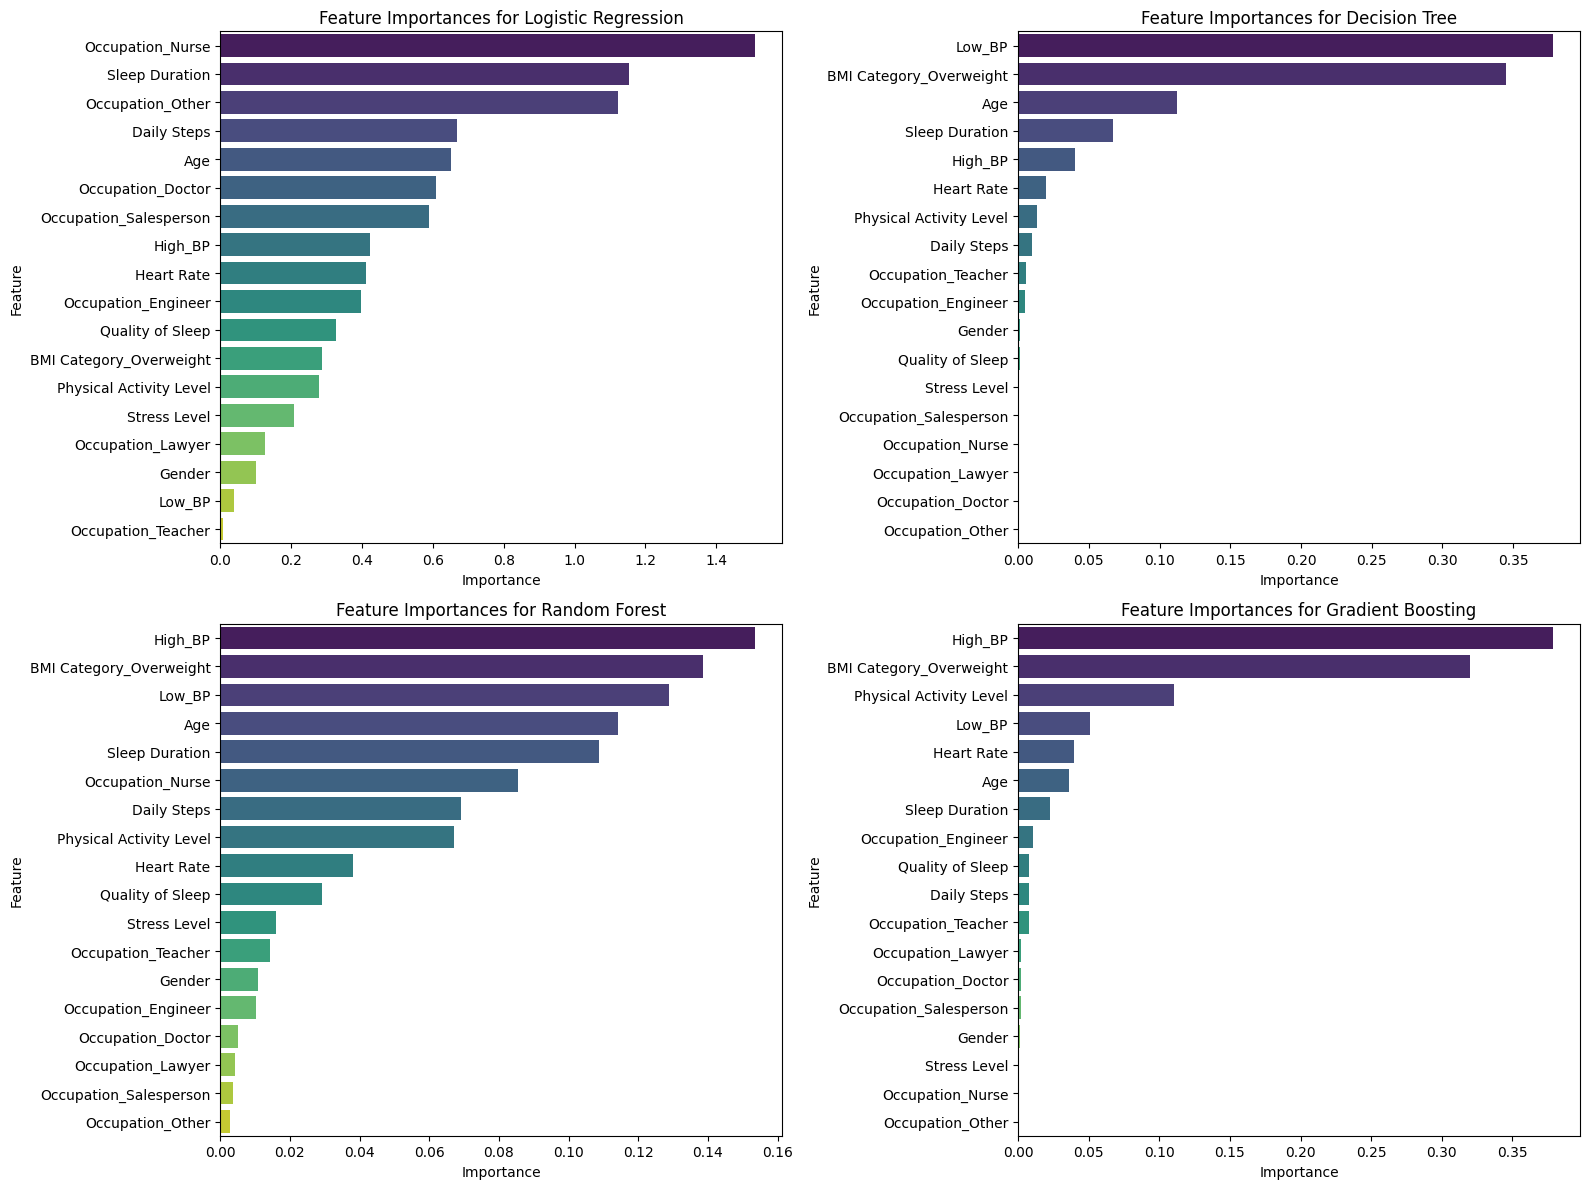

In [39]:
fig, axs = plt.subplots(2, 2, figsize=(16, 12))
axs = axs.flatten()

models_to_plot = [
    ('Logistic Regression', np.abs(models['Logistic Regression'].coef_[0])),
    ('Decision Tree', models['Decision Tree'].feature_importances_),
    ('Random Forest', models['Random Forest'].feature_importances_),
    ('Gradient Boosting', gb_model.feature_importances_)
]

for ax, (name, importances) in zip(axs, models_to_plot):
    importance_df = pd.DataFrame({
        'Feature': X.columns,
        'Importance': importances
    })
    importance_df = importance_df.sort_values(by='Importance', ascending=False)
    sns.barplot(data=importance_df, x='Importance', y='Feature', ax=ax, palette='viridis')
    ax.set_title(f'Feature Importances for {name}')
    ax.set_xlabel('Importance')
    ax.set_ylabel('Feature')
plt.tight_layout()
plt.show()

## Observations:

#### Logistic Regression (Untuned):
- Top Features: Occupation_Nurse, Sleep Duration, Occupation_Other, Occupation_Doctor, Age.

- Occupations dominates: The model heavily weights different occupations (nurse, doctor, other). This might be the result of some jobs being more associated with sleep disorder (eg. nurses and doctors with shift work).
- Sleep Duration as expected is critical.
- Age and Daily Steps have moderate importance.

Suprisingly, BMI Category_Overweight, High_BP, and Low_BP have a low influence, which might be due to regularisation shrinking their impact.
In addition, since logistic regression is linear, it may not capture complex interactions, resulting in the heavy reliance on categorical features like Occupation.

---

#### Decision Tree (Untuned):
- Top Features: Low_BP, BMI Category_Overweight, Age, Sleep Duration, High_BP

- Blood pressure, (Low_BP and High_BP) and BMI are dominant, suggesting that the tree is splitting early based on these threshold.
- Age and Sleep Duration still holds moderate importance.
- However categorical occupation features are largely unsued, might be becuase they dont provide informative splits in a simple untuned tree.

Overall, this model heavily relies on biometric indicators (BP, BMI, Age), which aligns with known medical risk factors for sleep disorders.

#### Random Forest (Untuned):
- Top Features: High_BP, BMI Category_Overweight, Low_BP, Age, Sleep Duration.

- Very balanced importance distribution, a stength that comes with Random Forest.
- BP and BMI remain on top, confirming their consistent influence.
- Acitivity based features (Steps, Physical Activity Level) and vital signs(Heart Rate, Quality of Sleep), also matter more here as compared to the Decision Tree.
- Occupation importance is also diminished.

Random Forest aggregates multiple decision trees, which leads to more reliable and smooth feature importance, reducing overfitting on any single variable.

---

#### Gradient Boosting (Untuned):
- Top Features: High_BP, BMI Category_Overweight, Physical Activity Level, Low_BP, Heart Rate.

- High_BP and BMI are the strongest once again.
- Physical Activity Level gains more prominence here as compared to in Random Forest.
- Sleep Duration and Age  are somewhat less important, which suggests that boosting found interactions between physical and health metrics more predictive.
- Most occupations and demographic features are nearly neglible.

Gradient Boosting emphasizes on correcting errors on misclassified instances. It learns the subtle patterns, physical activity, heart rate, and BP are the clearest signals.

---

#### Overall:
- Across all models, Blood Pressure (High/Low) and BMI are consistently top predictors, strong indicators of possible sleep-related conditions.
- Sleep Duration and Age, can also be seen to be frequently important.
- Occupation on the other hand, mattered mostly in Logistic Regression, possibly due to its treatment of categorical variables as independent coefficients.
- Finally, Physical Activity and vtals became more relevent in Gradient Boosting, capturing the nonlinear interactions better.


---

## Feature Importance (Tuned)

C:\Users\koziy\AppData\Local\Temp\ipykernel_41052\2687541733.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=importance_df, x='Importance', y='Feature', ax=ax, palette='viridis')
C:\Users\koziy\AppData\Local\Temp\ipykernel_41052\2687541733.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=importance_df, x='Importance', y='Feature', ax=ax, palette='viridis')
C:\Users\koziy\AppData\Local\Temp\ipykernel_41052\2687541733.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=importance_df, x='Importance', y='Feature', ax=ax,

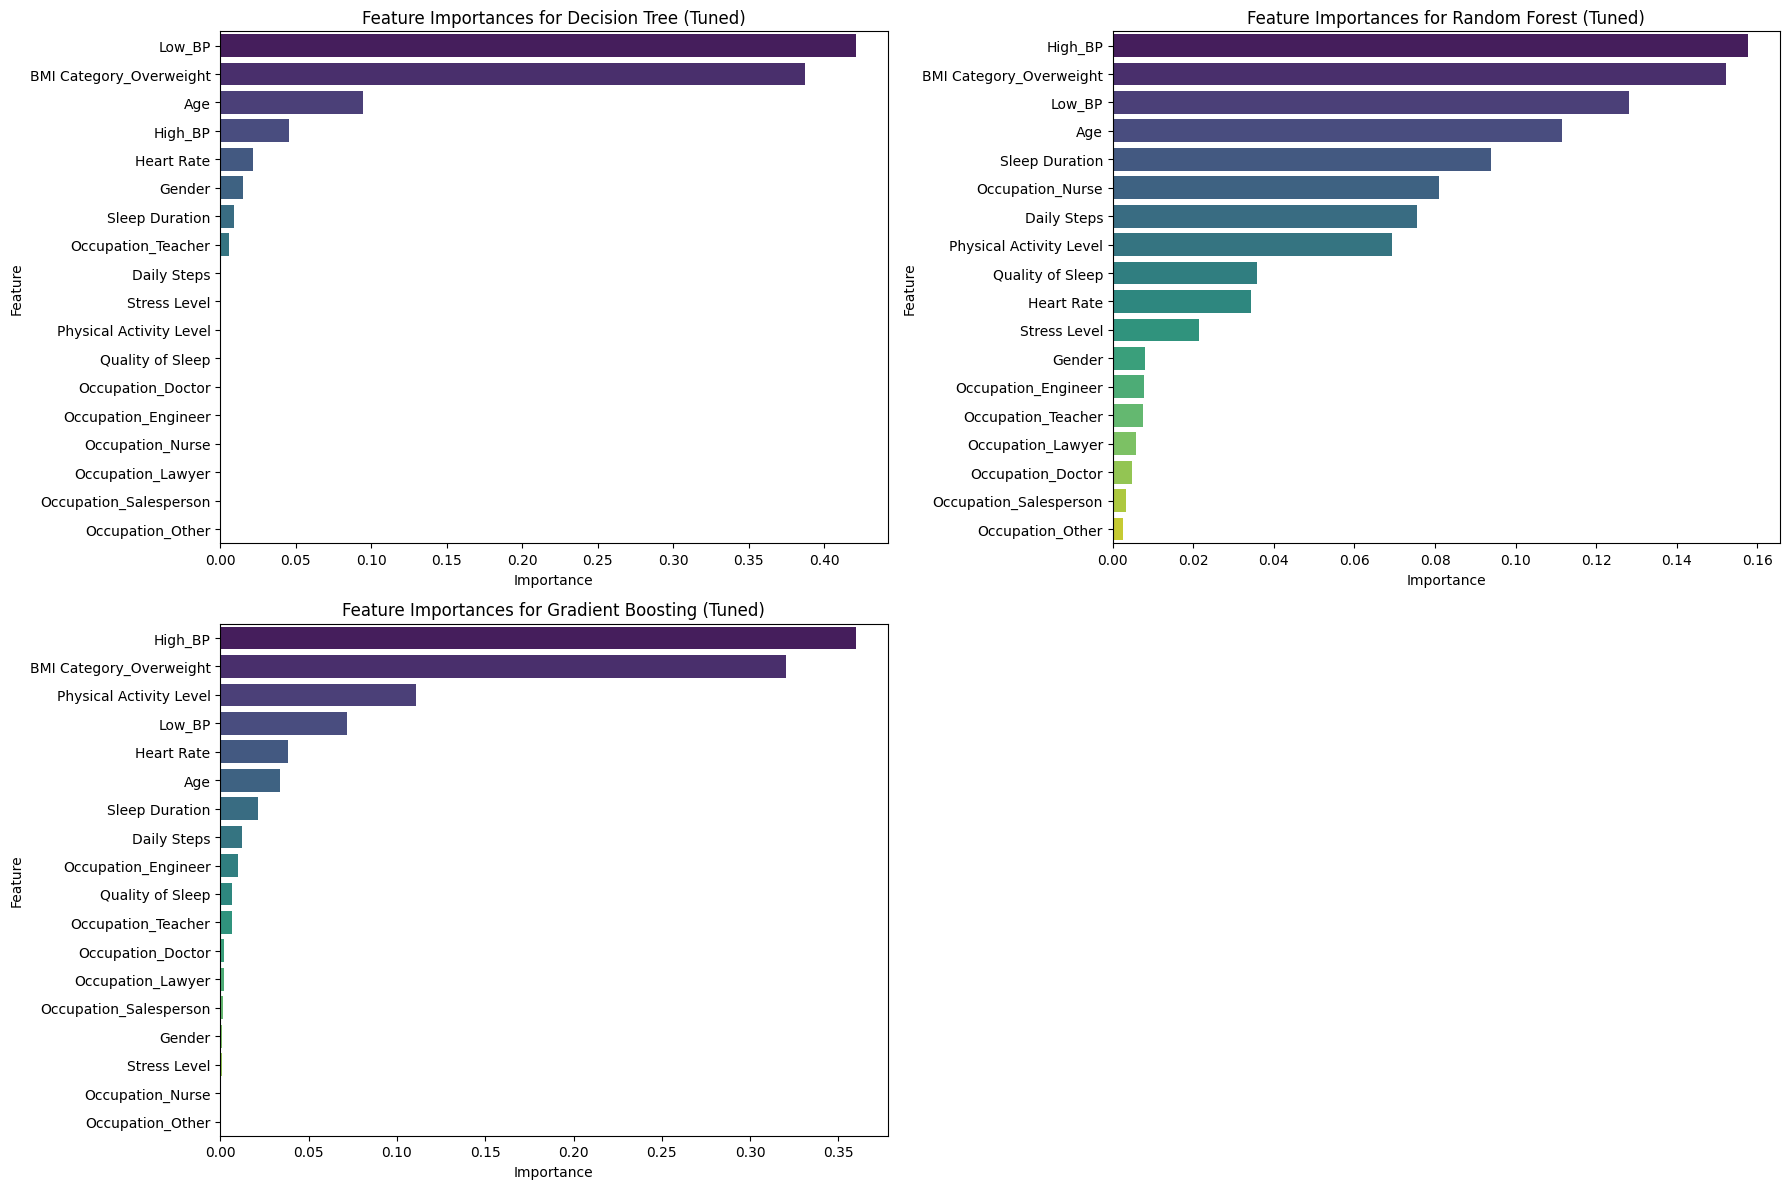

In [40]:
fig, axs = plt.subplots(2, 2, figsize=(18, 12))
axs = axs.flatten()

tuned_models_to_plot = [
    ('Decision Tree (Tuned)', tuned_models['Decision Tree'].feature_importances_),
    ('Random Forest (Tuned)', tuned_models['Random Forest'].feature_importances_),
    ('Gradient Boosting (Tuned)', best_gb_model.feature_importances_)
]

for ax, (name, importances) in zip(axs, tuned_models_to_plot):
    importance_df = pd.DataFrame({
        'Feature': X.columns,
        'Importance': importances
    })
    importance_df = importance_df.sort_values(by='Importance', ascending=False)
    sns.barplot(data=importance_df, x='Importance', y='Feature', ax=ax, palette='viridis')
    ax.set_title(f'Feature Importances for {name}')
    ax.set_xlabel('Importance')
    ax.set_ylabel('Feature')
    
    
axs[3].axis('off')  # Hide the unused subplot

plt.tight_layout()
plt.show()

## Observations:

#### Decision Tree (Tuned):
- Top features: Low_BP, BMI Category_Overweight, Age
- Moderate to low importance: High_BP, Heart Rate, Gender, Sleep Duration
- Negligible: Occupation related features (Daily Steps, Stress Level, etc)

- The tuned tree has sharpened focus, mostly splitting on just 3 features, Blood Pressure (Low), BMI and Age.
- This narrow focus, may have increased the performance, but it also risks overfitting, if the model relies too much on these.
- Seep Duration is also used far less now, as compared to the untuned model, might be due to less useful splits during training.

Tuning, made the tree more selective, relying heavily on clinically relevent metrics (BP, BMI, age).

---

#### Random Forest (Tuned):
- Top features: High_BP, BMI Category_Overweight, Low_BP, Age, Sleep Duration, Occupation_Nurse, Daily Steps.
- Balanced Usage: Physical Activity Level, Quality of Sleep, Heart Rate, Stress Level, Gender
- Low importance: Occupation types (Lawyer, Salesperson, Other, etc) are lowest again

- Random Forest maintains feature diversity, even after tuning.
- Still has an emphasis on medical indicators, BMI, BP, Sleep Duration, and Age.
- Physical metrics and even Occupation_Nurse, gained a slight importance.
- As compared to the untuned version, the top features got more distinct, in terms of importance with clearer gaps.

Tuning has improved focus, but preserved interpretability. Random Forest uses many features and spreads out the importance more fairly.

---

#### Gradient Boosting (Tuned):
- Top features: High_BP, BMI Category_Overweight, Physical Activity Level
- Moderate: Low_BP, Heart Rate, Age
- Low importance: Sleep Duration, Daily steps, and all Occupation types

- Boosting model turned to sharply priortise the top predictors, especially High_BP, and BMI.
- Physical Activity Level, now ranking in 3rd, may reflecting that the boosting found some subtle correlations with sleep disorders.
- Compared to the untuned version, it dropped importance for Sleep Duration and Occupation.
- Occupation has near-zero importance, showing boosting sees more value in quantitative health indicators.

Tuning had played an emphasis on interaction heavy features (BP, BMI, Activity Level), that gradient boosting can learn deeply.

---

#### Overall:
- Blood Pressure (High/Low) and BMI are consistently dominant across all models after tuning.
- Random Forest balances generalisation and interpretability, using a wider range of features.
- While Gradient Boosting became more decisive, in terms of favouring a few key features that offer high predictive power.
- Decision tree, becomes etremely selective, using just a few strong features, helping interpretability, but can often miss the nuance.
- Sleep Duration, while intuitively important, becomes secondary, when it comes to tree-based models, as compared to BP, and BMI.

---

## Overfitting Checks

In [41]:
#OverFitting check (Untuned Models)
for name, model in models.items():
    train_acc = accuracy_score(y_train, model.predict(X_train))
    test_acc = accuracy_score(y_test, model.predict(X_test))
    print(f"{name} - Training Accuracy: {train_acc:.4f}, Test Accuracy: {test_acc:.4f}")

Logistic Regression - Training Accuracy: 0.9064, Test Accuracy: 0.9333
Decision Tree - Training Accuracy: 0.9064, Test Accuracy: 0.8667
Random Forest - Training Accuracy: 0.9231, Test Accuracy: 0.9467
Gradient Boosting - Training Accuracy: 0.9197, Test Accuracy: 0.9600


#### Observations:
- Decision Tree (Untuned) is clearly overfitting, it memorised the training data, but failed to generalise.
- Gradient Boosting shows strong generalisation, higher testing accuracy than training.

---

In [42]:
#OverFitting check (Tuned Models)
for name, model in tuned_models.items():
    train_acc = accuracy_score(y_train, model.predict(X_train))
    test_acc = accuracy_score(y_test, model.predict(X_test))
    print(f"{name} - Training Accuracy: {train_acc:.4f}, Test Accuracy: {test_acc:.4f}")

Decision Tree - Training Accuracy: 0.9030, Test Accuracy: 0.9467
Random Forest - Training Accuracy: 0.9130, Test Accuracy: 0.9733
Gradient Boosting - Training Accuracy: 0.9197, Test Accuracy: 0.9600


#### Observations:
- Tuning significantly improved Decision Tree, closing the training-test gap.
- Random Forest (Tuned) performs better on test data than on training, this suggests strong generalisation and possibly a slightly small training set.
- While Gradient boosting continues to be consistently robust.

---

## ROC Curves and AUC (Untuned and Tuned Models)

#### Logistic Regression ROC (Untuned)

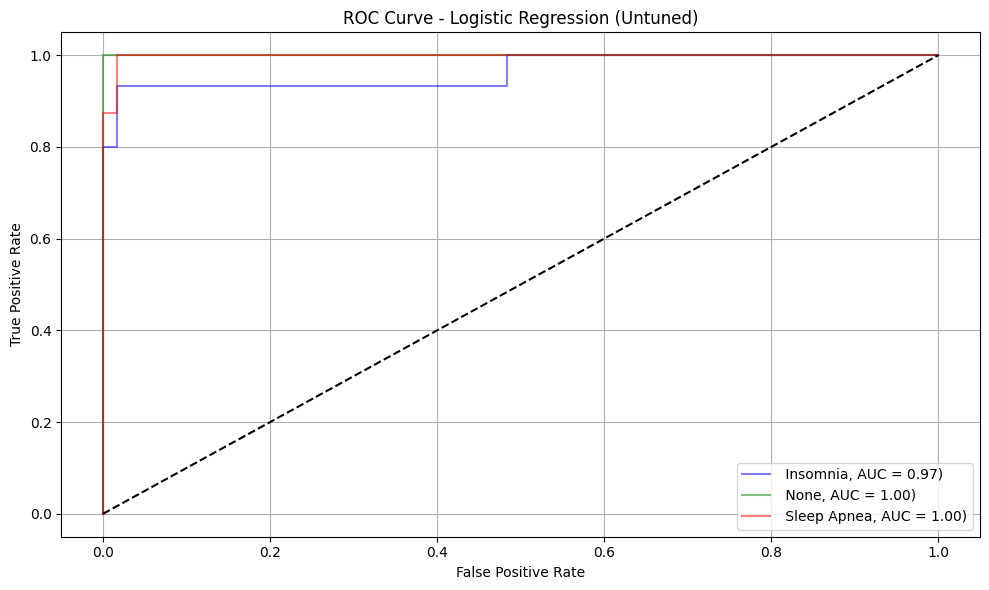

In [43]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# Binarize the output for multiclass ROC
n_classes = len(le.classes_)
y_test_bin = label_binarize(y_test, classes=range(n_classes))

y_score= models['Logistic Regression'].predict_proba(X_test)

plt.figure(figsize=(10, 6))
colors = ['b', 'g', 'r']

for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, color=colors[i], alpha=0.5, 
             label=f' {le.classes_[i]}, AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.title('ROC Curve - Logistic Regression (Untuned)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()

## Observations:
- Insomnia AUC = 0.96
- None AUC = 1.00
- Sleep Apnea AUC = 1.00

#### Curve Shape
- The ROC curves for None and Sleep Apnea, hugs the top-left corner, displaying a sign of near perfect classification.
- Insomnia also shows a very steep rise, flattening near the top, very high sensitivity, with minimal false positives.

#### Implications:
- Logistic Regression, being a linear classifer, performs especially well, which means the classes might be linearly separable in the feature space.
- Perfect AUCs for None and Sleep Apnea, might suggest clear feature signals.
- Simple and interpretable model, suitable for deployment when transparency is a priority.

---

#### Decision Tree ROC (Untuned)

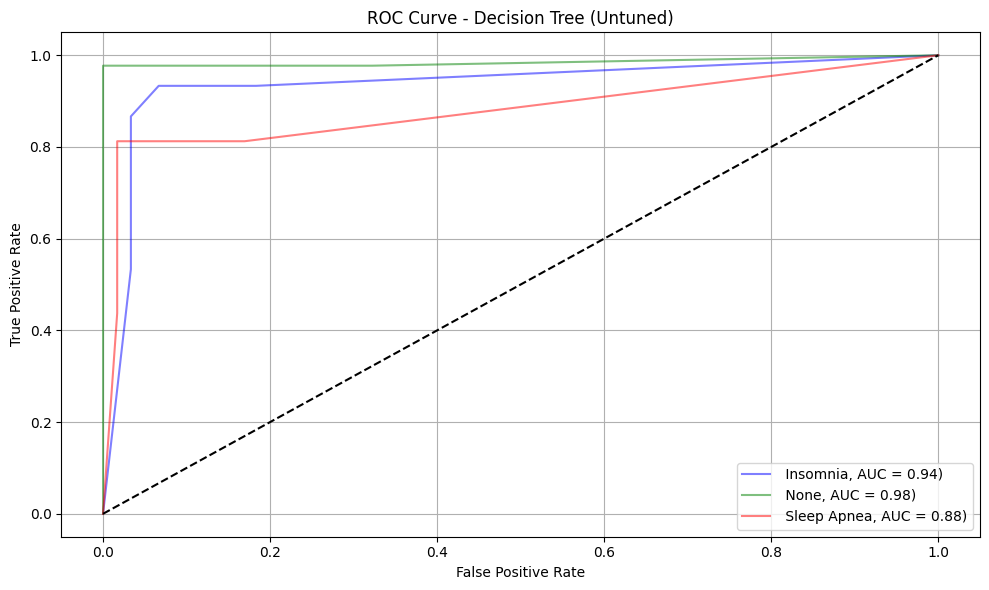

In [44]:
y_score= models['Decision Tree'].predict_proba(X_test)

plt.figure(figsize=(10, 6))
colors = ['b', 'g', 'r']

for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, color=colors[i], alpha=0.5, 
             label=f' {le.classes_[i]}, AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.title('ROC Curve - Decision Tree (Untuned)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()

## Observations:
- Insomnia AUC = 0.94
- None AUC = 0.98
- Sleep Apnea AUC = 0.88

#### Curve Shape
- Insomnia and None ROC curves are decent, but not perfectly vertical or flat, meaning some moderate false positives.
- Sleep Apnea curve on the other hand is flatter, suggesting less confidence in seperating Sleep Apnea cases.

#### Weakness:
- It is also likely to be overfitting to some samples, which is quite typical for decision trees.
- pooror generalisation, especially for the minority classes or the noiser features.

#### Implications:
- Despite the moderate ACUs, without pruning or tuning, the tree struggles to generalise Sleep Apnea correctly.
- Might be okay for exploratory analysis but not ready for deployment in its current state.

---

#### Random Forest ROC (Untuned)

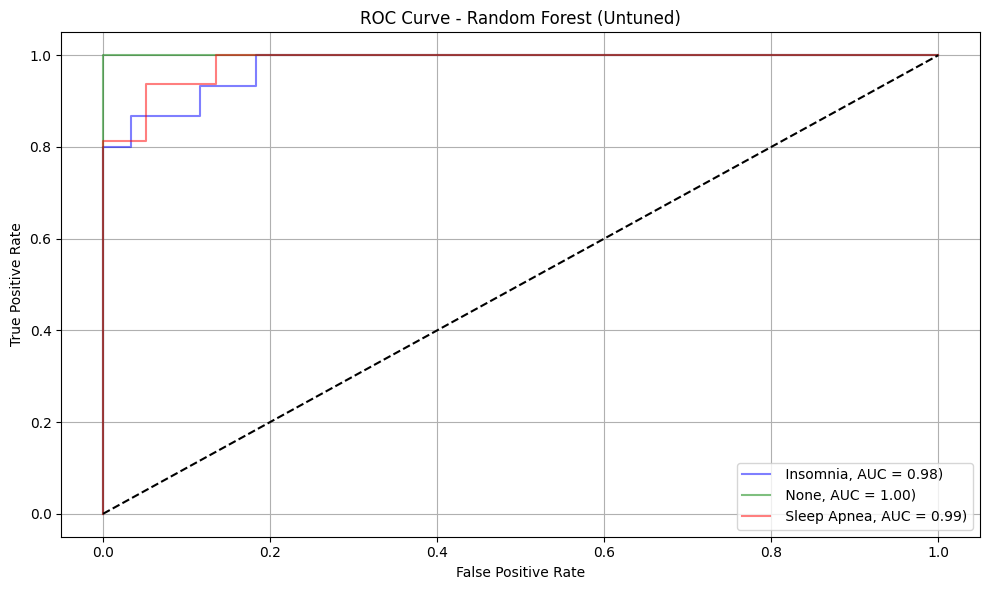

In [45]:
y_score = models['Random Forest'].predict_proba(X_test)

plt.figure(figsize=(10, 6))
colors = ['b', 'g', 'r']

for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, color=colors[i], alpha=0.5, 
             label=f' {le.classes_[i]}, AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.title('ROC Curve - Random Forest (Untuned)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()

## Observations:
- Insomnia AUC = 0.98
- None AUC = 1.00
- Sleep Apnea AUC = 0.99

#### Curve Shape
- All of the ROC curves hug the top left corner, a sign of excellent cclassification capability.
- Almost no area under the curve is wasted, displays a strong balance between sensitivity, and specificity.

#### Strengths:
- Reduces overfitting by averaging multiple trees
- Performs well even whilst untuned, due to ensemble robustness.

#### Implications:
- Very reliable model, suitable for real-world classification tasks without further tuning.
- May be slower to train, ass compared to Logistic Regression, but handles feature interactions better.

---

#### Gradient Boosting ROC (Untuned)

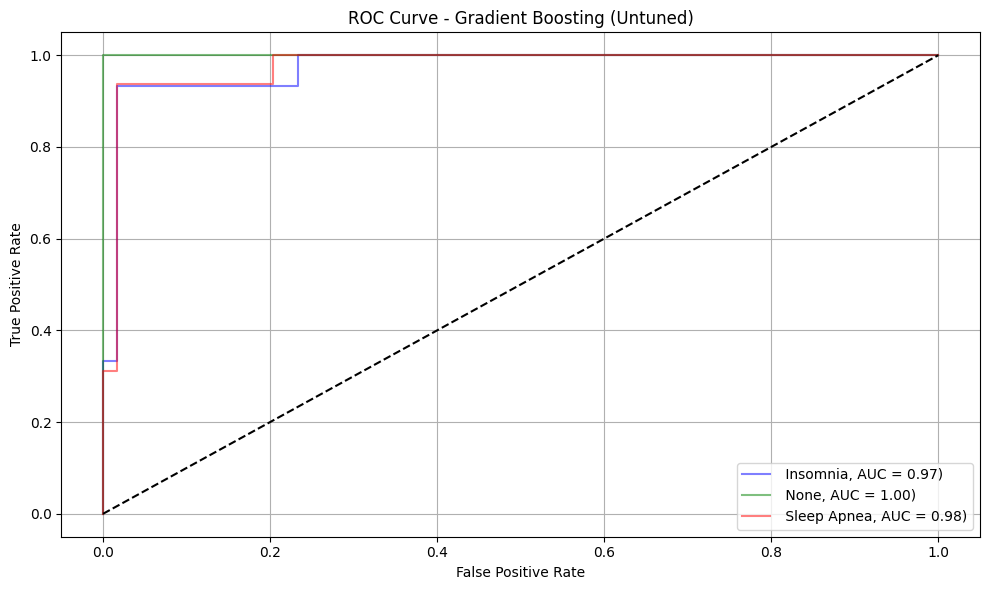

In [46]:
y_score = gb_model.predict_proba(X_test)

plt.figure(figsize=(10, 6))
colors = ['b', 'g', 'r']

for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, color=colors[i], alpha=0.5, 
             label=f' {le.classes_[i]}, AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.title('ROC Curve - Gradient Boosting (Untuned)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()

## Observations:
- Insomnia AUC = 0.97
- None AUC = 1.00
- Sleep Apnea AUC = 0.98

#### Curve Shape

- Like the Random Forest, all of the curves are nearly perfect.
- Has a slightly less sharp curve shape for Insomnia, than Random Forest, but still outstanding nonetheless.

#### Strengths:
- Gradient Boosting builds trees sequentially, each correcting the errors from the previous.
- It is also more sensitive to minor class patterns, which is why it handles the Sleep Apnea, and Insomnia well.

#### Weakness:
- It has a higher risk of overfitting, as compared to Random Forest if left unchecked.
- It also has a slower training and is harder to tune.

#### Implications:
- Excellent candidate for the sleep disorder classification, when maximum accuracy is desired and training time is acceptable.

---

#### ROC Curve Decision Tree (Tuned)

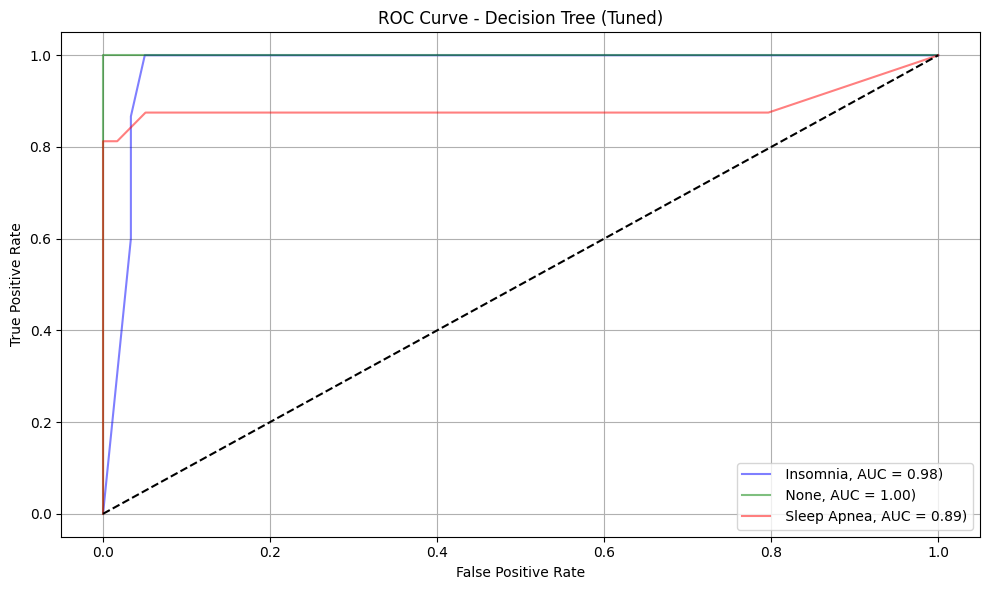

In [47]:
y_score= tuned_models['Decision Tree'].predict_proba(X_test)

plt.figure(figsize=(10, 6))
colors = ['b', 'g', 'r']

for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, color=colors[i], alpha=0.5, 
             label=f' {le.classes_[i]}, AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.title('ROC Curve - Decision Tree (Tuned)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()

## Observations:
- Insomnia AUC = 0.98. The tuned Decision Tree is highly effective in detecting Insomnia, nearly pefect classification.
- None AUC = 1.00. Perfect classification for healthy cases. This also means that the model almost never falsely identifies people with no disorder.
- Sleep Apnea AUC = 0.89. While lower than the others, this also indicates that this class is harder to distinguish correctly, and may have more false positives, or negatives.

#### Overall:
- Great improvement over the untuned model (Sleep Apnea AUC went up from 0.88 to 0.89), but remains weak in Apnea prediction.


---

#### ROC Curve Random Forest (Tuned)

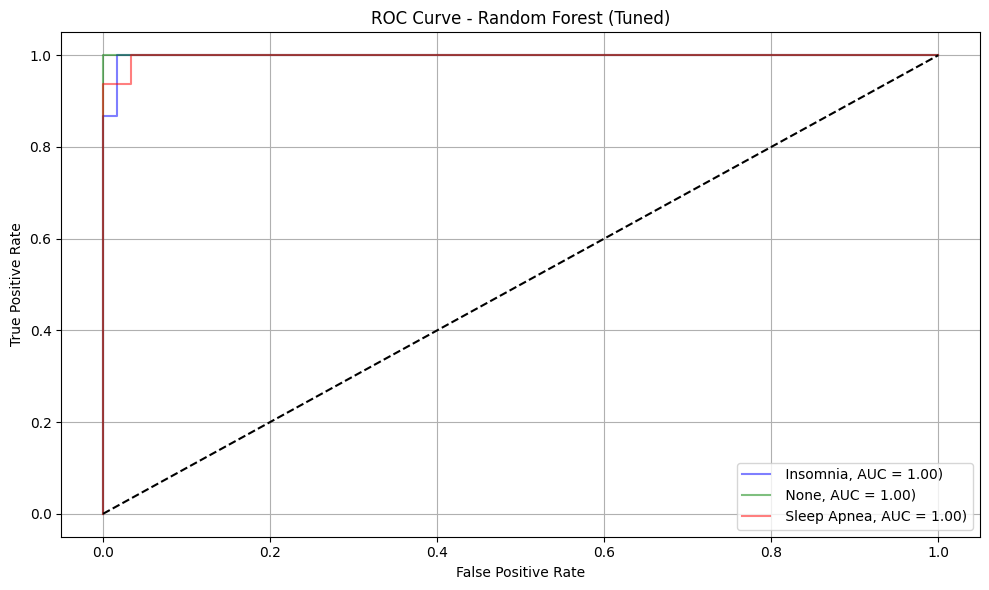

In [48]:
y_score = tuned_models['Random Forest'].predict_proba(X_test)

plt.figure(figsize=(10, 6))
colors = ['b', 'g', 'r']

for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, color=colors[i], alpha=0.5, 
             label=f' {le.classes_[i]}, AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.title('ROC Curve - Random Forest (Tuned)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()

## Observations:
- While it has Perfect classifiers across all 3 classes, this can either indicate very strong generalisation, or more likely to be overfitting, as this dataset is quite small.

#### Overall:
- While the AUC of 1.00 looks ideal, i will be cross checking with the confusion matrix above, for signs of imbalance, or model memorisation.

---

#### ROC Curve Gradient Boosting (Tuned)

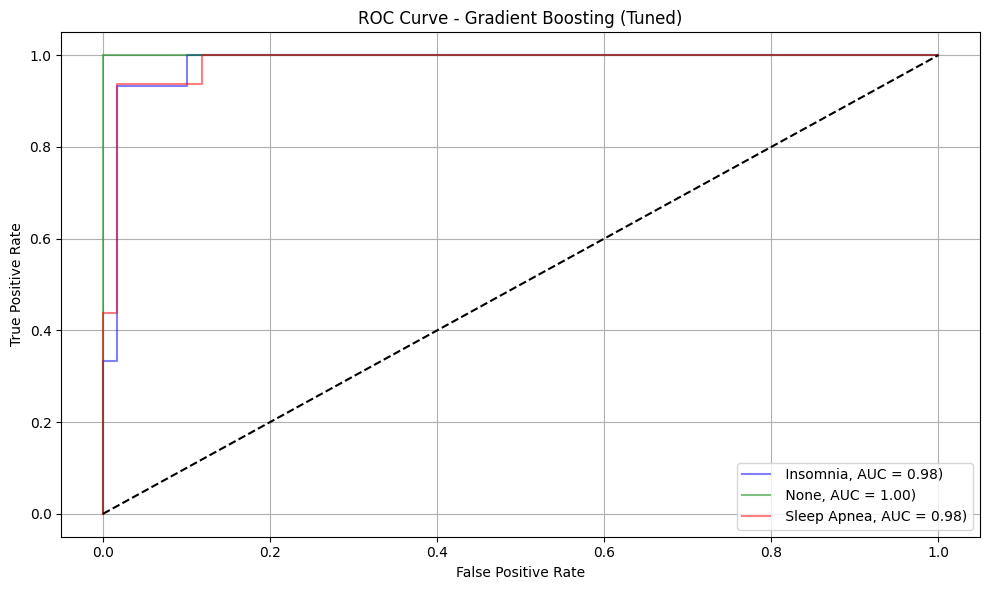

In [49]:
y_score = best_gb_model.predict_proba(X_test)

plt.figure(figsize=(10, 6))
colors = ['b', 'g', 'r']

for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, color=colors[i], alpha=0.5, 
             label=f' {le.classes_[i]}, AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.title('ROC Curve - Gradient Boosting (Tuned)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()

## Observations:
- All of the classes are well distinguished.
- Balanced and high performing model
- It is also very close to Random Forest, but with slightly more "realism" avoided the "perfect" 1.00, which is too good to be true.

#### Overall:
- Excellent candidate for the final model due to its performance without overfitting signals.

## Overall Observations for ROC/AUC

#### Gradient Boosting (Tuned):
- Is the most balanced and reliable model

#### Random Forest (Tuned):
- While it has achieved perfection on paper, it is treated with skepticism, till further validation, will double confirm later on.

#### Decision Tree (Tuned):
- Shows good improvement, but is still slightly weaker on classifying Sleep Apnea.

---

## Learning Curves (Untuned)

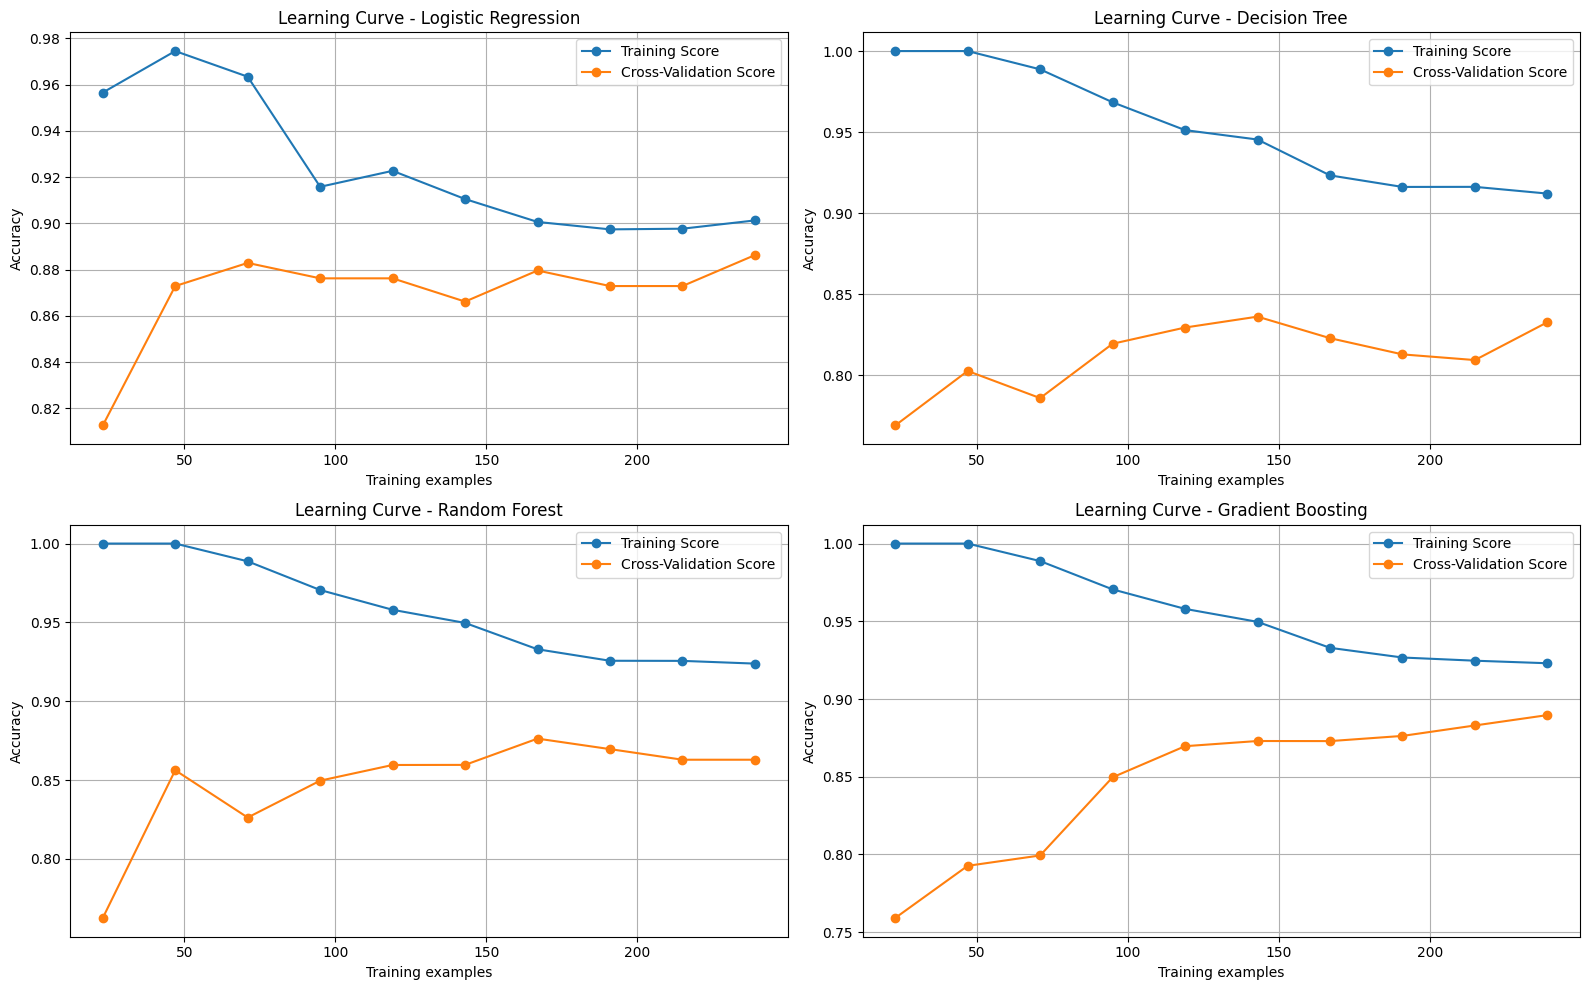

In [50]:
from sklearn.model_selection import learning_curve

fig, axs = plt.subplots(2, 2, figsize=(16, 10))
axs = axs.flatten()

for i, (name, model) in enumerate(models.items()):
    train_sizes, train_scores, test_scores = learning_curve(
        model, X_train, y_train, cv=5, scoring='accuracy', n_jobs=-1,
        train_sizes=np.linspace(0.1, 1.0, 10)
    )
    axs[i].plot(train_sizes, np.mean(train_scores, axis=1), label='Training Score', marker='o')
    axs[i].plot(train_sizes, np.mean(test_scores, axis=1), label='Cross-Validation Score', marker='o')
    axs[i].set_title(f'Learning Curve - {name}')
    axs[i].set_xlabel('Training examples')
    axs[i].set_ylabel('Accuracy')
    axs[i].legend()
    axs[i].grid(True)

plt.tight_layout()
plt.show()

## Observations:

#### Logistic Regression:
- Training Score: Starts out high (~0.96) but descreases slightly as more data is added, stabilising (~0.90).
- Cross-Validation Score: Starts low (~0.82) but increases steadily and converges (~0.88)
- Gap: It has a moderate gap between training and validation scores.

- Logistic Regression shows a low variance, and a moderate bias, but as training size increases, the model learns better generalisation.
- The validation score stabilising, implies that more data helps performance, but further improvements may plateau unless the features are enriched.

---

#### Decision Tree:
- Training Score: Perfect (1.00) initially, but dropped slightly to (~0.91)
- Cross-Validation Score: Remains much lower, from (~0.76) to (~0.83)
- Gap: Has a very large and consistent ap, which is a classic sign of Overfitting.

- The Decision Tree is memorising the training data (Low bias, high variance), failing to generalise it well, high variance problem.
- This indicates that regularisation, pruning, or ensemble methods are needed.

---

#### Random Forest:
- Training Score: High (starts at 1.00), ends at (~0.93)
- Cross-Validation Score: Starts low (~0.77), but improves and stabilises from (~0.86) to (~0.88)
- Gap: Smaller gap than that of Decision Tree, but still present. 

- Random Forest significantly reduces the overfitting, as compared to a single decision tree. While still maintaining high accuracy on both training and validation sets.
- This shows that the ensemble effect is successfully bringing bias and variance, but could still benefit slightly from hyperparameter tuning to reduce the training score (overfitting risk).

---

#### Gradient Boosting:
- Training Score: High initially (1.00), but gradually dropped to (~0.93)
- Cross-Validation Score: Steadily increases from (~0.76) to (~0.89), outperforming all the others, on validation itself.
- Gap: The gap reduces as the training size grows, one of the best generalisation behaviour.

- Gradient Boosting has excellent learning behaviour, displaying smooth convergence of train/test curve.
- It also shows lower variance, than that of Decision Tree, and better generalisation than Random Forest.
- However, the small gap and strong upward trend in validation itself, suggests that more data could further improve performance.

---

#### Overall:
- Gradient Boosting performed the best in generalisation and showed the least variance.
- Decision Tree, overfitted heavily, and requires tuning.
- Random Forest benefitted from ensemble learning, but may still benefit from hyperparameter tuning.
- Logistic Regression itself, is stable and interpretable, with room to improve accuracy by feature engineering.

---

## Learning Curves (Tuned)

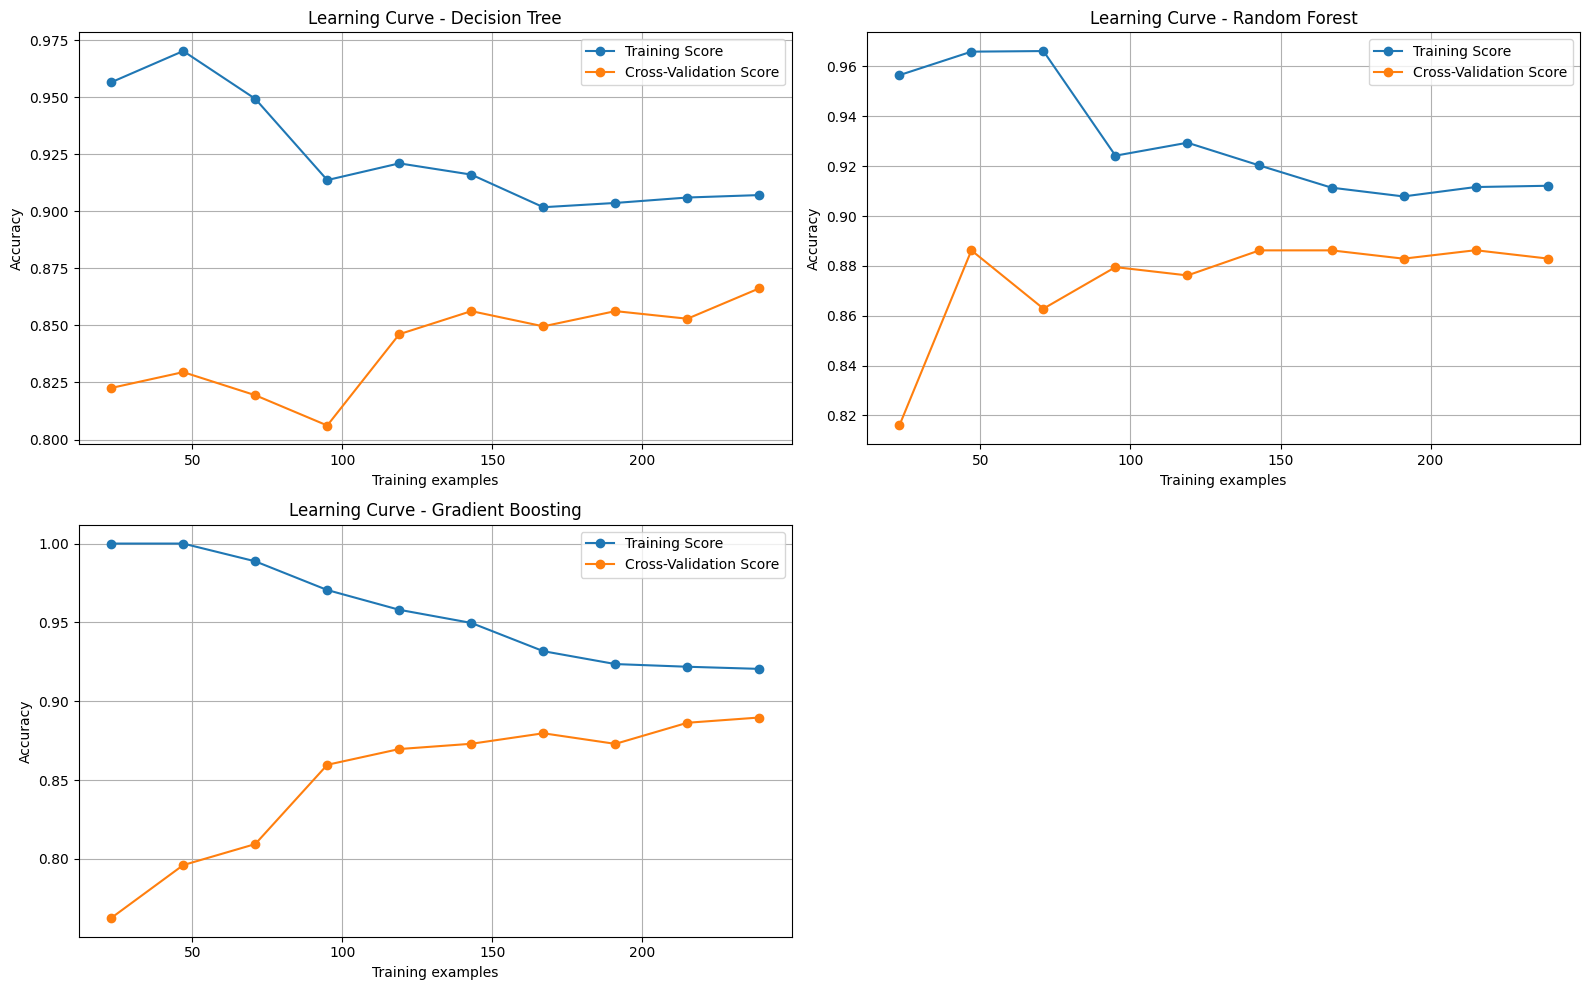

In [51]:
fig, axs = plt.subplots(2, 2, figsize=(16, 10))
axs = axs.flatten()

for i, (name, model) in enumerate(tuned_models.items()):
    train_sizes, train_scores, test_scores = learning_curve(
        model, X_train, y_train, cv=5, scoring='accuracy', n_jobs=-1,
        train_sizes=np.linspace(0.1, 1.0, 10)
    )
    
    axs[i].plot(train_sizes, np.mean(train_scores, axis=1), label='Training Score', marker='o')
    axs[i].plot(train_sizes, np.mean(test_scores, axis=1), label='Cross-Validation Score', marker='o')
    axs[i].set_title(f'Learning Curve - {name}')
    axs[i].set_xlabel('Training examples')
    axs[i].set_ylabel('Accuracy')
    axs[i].legend()
    axs[i].grid(True)
    
axs[3].axis('off')  # Hide the unused subplot
plt.tight_layout()
plt.show()

## Observations:

#### Decision Tree (Tuned):
- Training Score: Starts very high (~0.96 to ~0.97), but drops and stablises from (~0.90 to ~0.91)
- Cross-Validation Score: Shows improvement from (~0.82 to ~0.86/~0.87) as the training size increases.
- Gap: The gap between training and validation scores is now narrower than in the untuned version.

- The tuning helped to reduce overfitting, previously, the tree memorised the training data (score = 1.0), now it is more generalisable.
- While there is still some overfitting, it has better bias-variance tradeoff.
- Cross-validation accuracy has improved as well, indicating better generalisation than that of the untuned version.

---

#### Random Forest (Tuned):
- Training Score: Reduced slightly, when compared to the untuned version (now around ~0.91 to ~0.93)
- Cross-Validation Score: Has a steady improvement, reaching (~0.88 to ~0.89)
- Gap: The gap between training and validation curves has reduced, and both lines itself show consistent trends.

- Hyperparameter tuning had helped to reduce overfitting, while maintaining its strong performance.
- The model now generalises better, and cross validation performance is more stable.
- In addition, the learning curve also shows clear convergence, indicating that the model is well balanced.

---

### Gradient Boosting (Tuned):
- Training Score: Starts high (1.0), and gradually drops to (~0.92)
- Cross-Validation Score: Improves consistently, ending near (~0.89 to ~0.90), which is the highest among the tuned models.
- Gap: The smallest gap among all models, and the validation curve continues to rise.

- Gradient Boosting (Tuned) remains as the best performing model.
- It has low bias and low variance, which is an ideal learning curve shape.
- The continued rise in its validation accuracy, actually suggests that the model benefits from more data, and tuning helped to fully maximise its potential.

---

#### Overall:
- Tuning clearly helped all models to reduce overfitting, and improve validation performance.
- Gradient Boosting (Tuned) consistently offered the best bias-variance tradeoff, and the highest performance.
- Random Forest (Tuned) is also robust and improved greatly.
- Decision Tree (Tuned) has improved significantly, but still trails behind the ensemble methods.

---

## Final Justification

After evaluating, and based off of all the tuned model evaluations. The model for deployment to be used, would be the (Tuned) Gradient Boosting.

#### Model Accuracy and F1 Score.
- It achived the highest accuracy and F1 score scross the board, and its classification performance was the most balanced across the sleep disorder classes.
- The confusion matrix also showed fewer false positive and false negatives, especially for borderline, or minority clsses like Insomnia, and Sleep Apnea.

#### Overall:
- High predictive performance, and balanced classification (Not biased towards dominant class).

---

#### Learning Curve Insights:
- The Gradient Boosting learning curve had exhibited the smallest gap between the training and validation accuracy (~0.92 vs ~0.89).
- In addition, the validation score steadily increased with more training data, indicating that the model learns effectively without overfitting.

#### Overall:
- Excellent bias-variance tradeoff
- Model can scale well with more data (Benefit from additional training examples)
- Stable performance, means lower risk of performance dropping on unseen data.

---

#### Feature Importance Analysis:
- Gradient Boosting identified clinically relevent features such as High_BP, BMI, Physical Activity Level, Low_BP, as the most important.
- Thus aliging with medical understanding, reinforcing that the model is not only accurate, but it is interpretable and trustworthy.

#### Overall:
- High importance of relevent health indicators
- Interpretability, supports use in health related decision making (clinical settings)

---

#### Overfitting and Generalisation:
- Compared to the untuned models, tuning reduced its iverfitting significantly in Gradient Boosting.
- There is minimal divergence between the training, and validation performance.
- The ROC/AUC scores remained consistently high across folds, indicating robust generalisation.

#### Overall:
- Low overfitting risk
- Reliable and stable performance across the different data splits.

---

#### ROC and AUC Performance:
- Gradient Boosting itself, achieved the highest AUC (Area Under Curve) in ROC comparisons.
- It had the best true positive vs false positive tradeoffs across all classes.

#### Overall:
- Best model for discriminating between sleep disorder classes.
- Suitable for high-stake health predictions, where false negatives can be critical. (IRL setting)

---

#### Confusion Matirx
- Gradient Boosting showed strong true positive rates across all categories.
- Unlike Decision Tree, and Logistic Regression, it had fewer misclassifications, especially when it came to the minority classes.

#### Overall:
- It has a more reliable prediction across both majority, and minority classes.
- It reduces bias, making it more suitable for diverse patient populations.

---

All in all, it offers the best overall balance of, high and reliable accuracy, low overfitting risk, interpretability of key health features, strong generalisation, and the best performance for all sleep disorder classes.

It is especially suitable to be used in domains like healthcare and wellness, where robust, and trustworthy predictions are essential.

---


## Prepare Model for Deployment

In [ ]:
import joblib

joblib.dump(best_gb_model, 'final_sleep_disorder_model.pkl')
joblib.dump(scaler, 'scaler.pkl')

# Save the label encoder
joblib.dump(le, 'label_encoder.pkl')
# Save the cleaned DataFrame
df.to_csv('final_cleaned_sleep_data.csv', index=False)

FileNotFoundError: [Errno 2] No such file or directory: 'models/final_sleep_disorder_model.pkl'

In [ ]:
print(X.columns.tolist())

['Gender', 'Age', 'Sleep Duration', 'Quality of Sleep', 'Physical Activity Level', 'Stress Level', 'Heart Rate', 'Daily Steps', 'High_BP', 'Low_BP', 'Occupation_Doctor', 'Occupation_Engineer', 'Occupation_Lawyer', 'Occupation_Nurse', 'Occupation_Other', 'Occupation_Salesperson', 'Occupation_Teacher', 'BMI Category_Overweight']


In [ ]:
print(f"Number of input features: {best_gb_model.n_features_in_}")

Number of input features: 18


In [ ]:
print(scaler.n_features_in_)

9
